# Import libraries

In [138]:
import pandas as pd
from scipy import stats
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Data

In [195]:
Goal1 = pd.read_excel(r'/Users/bkemp/Data Science/Project/Data/AllGoals.xlsx','Goal1')
Goal3 = pd.read_excel(r'/Users/bkemp/Data Science/Project/Data/AllGoals.xlsx','Goal3')
Goal6 = pd.read_excel(r'/Users/bkemp/Data Science/Project/Data/AllGoals.xlsx','Goal6')
Goal10 = pd.read_excel(r'/Users/bkemp/Data Science/Project/Data/AllGoals.xlsx','Goal10')
Goal11 = pd.read_excel(r'/Users/bkemp/Data Science/Project/Data/AllGoals.xlsx','Goal11')
Goal12 = pd.read_excel(r'/Users/bkemp/Data Science/Project/Data/AllGoals.xlsx','Goal12')
Goals = pd.concat([Goal1,Goal3,Goal6,Goal10,Goal11,Goal12])
signData = pd.read_excel(r'/Users/bkemp/Data Science/Project/Data/seriescode_sign_literature.xlsx','seriescode_sign_literature')
signs=signData[['code','sign']]
signs.drop_duplicates(inplace=True)

# Indicator Data

In [196]:
Goals.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       'TimeCoverage', 'UpperBound', 'LowerBound', 'BasePeriod', 'Source',
       'GeoInfoUrl', 'FootNote', 'Activity', 'Age', 'Cities', 'Counterpart',
       'Deviation Level', 'Disability status', 'Fiscal intervention stage',
       'Food Waste Sector', 'Freq', 'Government_Name',
       'Grounds of discrimination', 'Hazard type', 'IHR Capacity',
       'Level of requirement', 'Level/Status', 'Level_of_government',
       'Location', 'Name of international institution',
       'Name of non-communicable disease', 'Nature', 'Observation Status',
       'Policy Domains', 'Policy instruments', 'Quantile', 'Reporting Type',
       'Sex', 'Substance use disorders', 'Type of occupation',
       'Type of product', 'Type of waste treatment', 'Units'],
      dtype='object')

In [197]:
indData=Goals

In [198]:
indData.drop(columns=['TimePeriod','Value','GeoAreaCode','GeoAreaName','Time_Detail','TimeCoverage','UpperBound','LowerBound','BasePeriod','Source','GeoInfoUrl','FootNote','Nature','Reporting Type'],axis=1,inplace=True)

In [199]:
indData.dropna(axis=1,how='all',inplace=True)

In [200]:
indData.drop_duplicates(inplace=True)

In [201]:
indData

Goal Target Indicator       SeriesCode  \
0       1    1.1     1.1.1      SI_POV_DAY1   
30      1    1.1     1.1.1      SI_POV_EMP1   
31      1    1.1     1.1.1      SI_POV_EMP1   
32      1    1.1     1.1.1      SI_POV_EMP1   
33      1    1.1     1.1.1      SI_POV_EMP1   
..    ...    ...       ...              ...   
951    12   12.b    12.b.1    ST_EEV_ACCTSA   
960    12   12.b    12.b.1   ST_EEV_STDACCT   
969    12   12.c    12.c.1      ER_FFS_CMPT   
971    12   12.c    12.c.1  ER_FFS_CMPT_GDP   
973    12   12.c    12.c.1   ER_FFS_CMPT_PC   

                                     SeriesDescription Activity  Age Cities  \
0    Proportion of population below international p...      NaN  NaN    NaN   
30   Employed population below international povert...      NaN  25+    NaN   
31   Employed population below international povert...      NaN  15+    NaN   
32   Employed population below international povert...      NaN  15+    NaN   
33   Employed population below international povert...      NaN  25+    NaN   
..                                                 ...      ...  ...    ...   
951  Implementation of standard accounting tools to...      NaN  NaN    NaN   
960  Implementation of standard accounting tools to...      NaN  NaN    NaN   
969  Fossil-fuel subsidies (consumption and product...      NaN  NaN    NaN   
971  Fossil-fuel subsidies (consumption and product...      NaN  NaN    NaN   
973  Fossil-fuel subsidies (consumption and product...      NaN  NaN    NaN   

    Counterpart Disability status  ... Location  \
0           NaN               NaN  ...      NaN   
30          NaN               NaN  ...      NaN   
31          NaN               NaN  ...      NaN   
32          NaN               NaN  ...      NaN   
33          NaN               NaN  ...      NaN   
..          ...               ...  ...      ...   
951         NaN               NaN  ...      NaN   
960         NaN               NaN  ...      NaN   
969         NaN               NaN  ...      NaN   
971         NaN               NaN  ...      NaN   
973         NaN               NaN  ...      NaN   

    Name of international institution Name of non-communicable disease  \
0                                 NaN                              NaN   
30                                NaN                              NaN   
31                                NaN                              NaN   
32                                NaN                              NaN   
33                                NaN                              NaN   
..                                ...                              ...   
951                               NaN                              NaN   
960                               NaN                              NaN   
969                               NaN                              NaN   
971                               NaN                              NaN   
973                               NaN                              NaN   

    Observation Status Quantile      Sex Type of occupation Type of product  \
0                  NaN      NaN      NaN                NaN             NaN   
30                 NaN      NaN  BOTHSEX                NaN             NaN   
31                 NaN      NaN  BOTHSEX                NaN             NaN   
32                 NaN      NaN   FEMALE                NaN             NaN   
33                 NaN      NaN   FEMALE                NaN             NaN   
..                 ...      ...      ...                ...             ...   
951                NaN      NaN      NaN                NaN             NaN   
960                NaN      NaN      NaN                NaN             NaN   
969                NaN      NaN      NaN                NaN             NaN   
971                NaN      NaN      NaN                NaN             NaN   
973                NaN      NaN      NaN                NaN             NaN   

    Type of waste treatment      Units  

In [202]:
gdata=indData.loc[indData['Goal']==int(input('Enter Goal: '))].dropna(axis=1,how='all',inplace=False)

Enter Goal: 1


In [134]:
gdata.iloc[:,2:4].drop_duplicates()

Indicator        SeriesCode
0      12.2.2    EN_MAT_DOMCMPC
285    12.2.2    EN_MAT_DOMCMPG
570    12.2.2    EN_MAT_DOMCMPT
855    12.4.1   SG_HAZ_CMRBASEL
856    12.4.1   SG_HAZ_CMRMNTRL
857    12.4.1  SG_HAZ_CMRROTDAM
858    12.4.1  SG_HAZ_CMRSTHOLM
859    12.4.2      EN_MWT_COLLV
871    12.4.2     EN_MWT_TREATR
885    12.4.2       EN_TWT_GENV
913    12.5.1       EN_MWT_RCYV
925    12.a.1       EG_EGY_RNEW
942    12.b.1    ST_EEV_ACCSEEA
951    12.b.1     ST_EEV_ACCTSA
960    12.b.1    ST_EEV_STDACCT
969    12.c.1       ER_FFS_CMPT
971    12.c.1   ER_FFS_CMPT_GDP
973    12.c.1    ER_FFS_CMPT_PC

In [44]:
indData.loc[indData['SeriesCode']==input('Enter Series Code: ')].dropna(axis=1,how='all',inplace=False)

Enter Series Code: EN_TWT_GENV


Goal Target Indicator   SeriesCode  \
885    12   12.4    12.4.2  EN_TWT_GENV   
886    12   12.4    12.4.2  EN_TWT_GENV   
887    12   12.4    12.4.2  EN_TWT_GENV   
888    12   12.4    12.4.2  EN_TWT_GENV   

                                SeriesDescription Activity   Units  
885  Total waste generation, by activity (Tonnes)  ISIC4_F  TONNES  
886  Total waste generation, by activity (Tonnes)  ISIC4_C  TONNES  
887  Total waste generation, by activity (Tonnes)    TOTAL  TONNES  
888  Total waste generation, by activity (Tonnes)  ISIC4_T  TONNES

# Clean Data

In [140]:
def clean(rawData):

    #Drop columns not needed
    rawData.drop(columns=['Goal','Target','SeriesDescription','GeoAreaCode','GeoAreaName','Time_Detail','TimeCoverage','UpperBound','LowerBound','BasePeriod','Source','GeoInfoUrl','FootNote','Nature','Reporting Type','Units'],axis=1,inplace=True)
   
    #Drop columns with all na (not used for disaggregation)
    rawData.dropna(axis=1,how='all',inplace=True)
    
    #Add signs
    for j in range(0,len(signs)):
        code=signs.iloc[j][0]
        sig=signs.iloc[j][1]
        rawData.loc[rawData['SeriesCode']==code,'Value']=rawData.loc[rawData['SeriesCode']==code,'Value']*sig
        
    #Extract disaggregation columns 
    disagg=rawData.columns[4:].tolist()
    col=['Indicator','SeriesCode']
    for j in range(0,len(disagg)):
        col.append(disagg[j])
        
    #Pivot data
    Data=rawData.pivot(index='TimePeriod',columns=col,values='Value')
    
    #Drop data with less than 3 values
    Data.dropna(axis=1,thresh=3,inplace=True)
    
    #New Dataframe
    Years=Data.index.values
    col1=Data.iloc[:,0]
    col1val=col1.values
    col1name=col1.name
    col1code=col1name[1]+'--'

    for n in range(len(col1name)-2):
        if type(col1name[n+2]) == str:
            col1code=col1code+col1name[n+2]+'_'
            
    cleanData=pd.DataFrame(col1val,index=Years,columns=[[col1name[0]],[col1code]])

    for k in range(1,len(Data.columns)-1):
        colname=Data.iloc[:,k].name
        colcode=colname[1]+'--'
        for n in range(len(colname)-2):
            if type(colname[n+2]) == str:
                colcode=colcode+colname[n+2]+'_'
        cleanData[colname[0],colcode]=Data.iloc[:,k].values
        
        #Perform Correlation
        #corrmat=cleanData.corr(method="spearman",min_periods=3)
        
    return cleanData

In [141]:
clnData = clean(Goals)

/var/folders/5h/nl7cgmvx6cv0_q4zj9wkhhg00000gn/T/ipykernel_4769/1956238151.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  cleanData[colname[0],colcode]=Data.iloc[:,k].values


In [71]:
clnData

1.1.1                                                      \
     SI_POV_DAY1-- SI_POV_EMP1--25+_BOTHSEX_ SI_POV_EMP1--15+_BOTHSEX_   
1983         -27.4                       NaN                       NaN   
1984         -26.7                       NaN                       NaN   
1985         -23.1                       NaN                       NaN   
1986         -10.5                       NaN                       NaN   
1987         -17.7                       NaN                       NaN   
1988         -20.0                       NaN                       NaN   
1989         -18.2                       NaN                       NaN   
1990         -21.5                       NaN                       NaN   
1992         -20.7                       NaN                       NaN   
1993         -19.8                       NaN                       NaN   
1995         -12.9                       NaN                       NaN   
1996         -14.1                       NaN                       NaN   
1997         -14.0                       NaN                       NaN   
1998         -12.7                       NaN                       NaN   
1999         -13.3                       NaN                       NaN   
2000           NaN                      -8.1                      -8.1   
2001         -11.5                      -7.5                      -7.5   
2002         -10.2                      -6.9                      -6.9   
2003         -11.0                      -7.4                      -7.4   
2004          -9.7                      -5.4                      -5.8   
2005          -8.6                      -4.9                      -5.2   
2006          -7.2                      -3.9                      -4.2   
2007          -6.7                      -3.5                      -3.7   
2008          -5.5                      -2.8                      -2.9   
2009          -5.4                      -2.6                      -2.7   
2010           NaN                      -2.1                      -2.3   
2011          -4.7                      -2.0                      -2.1   
2012          -3.7                      -1.4                      -1.5   
2013          -3.1                      -0.8                      -0.9   
2014          -2.7                      -0.7                      -0.8   
2015          -3.2                      -0.9                      -0.9   
2016          -3.9                      -1.3                      -1.3   

                                                        \
     SI_POV_EMP1--15+_FEMALE_ SI_POV_EMP1--25+_FEMALE_   
1983                      NaN                      NaN   
1984                      NaN                      NaN   
1985                      NaN                      NaN   
1986                      NaN                      NaN   
1987                      NaN                      NaN   
1988                      NaN                      NaN   
1989                      NaN                      NaN   
1990                      NaN                      NaN   
1992                      NaN                      NaN   
1993                      NaN                      NaN   
1995                      NaN                      NaN   
1996                      NaN                      NaN   
1997                      NaN                      NaN   
1998                      NaN                      NaN   
1999                      NaN                      NaN   
2000                     -7.9                     -7.9   
2001                     -7.4                     -7.5   
2002                     -6.6                     -6.7   
2003                     -7.3                     -7.3   
2004                     -5.5                     -5.2   
2005                     -5.1                     -4.8   
2006                     -4.0                     -3.8   
2007                     -3.7                     -3.5   
2008                     -2.9                 

# Correlation

In [142]:
corrmat=clnData.corr(method="spearman",min_periods=3)

In [492]:
corrmat.index.get_level_values(0).drop_duplicates()
#50 communities

Index(['1.1.1', '1.3.1', '1.4.1', '1.5.1', '1.5.2', '1.a.1', '1.a.2', '3.1.1',
       '3.1.2', '3.2.1', '3.2.2', '3.3.1', '3.3.2', '3.3.3', '3.3.5', '3.4.1',
       '3.4.2', '3.5.2', '3.6.1', '3.7.2', '3.8.1', '3.9.3', '3.a.1', '3.b.1',
       '3.b.2', '3.c.1', '3.d.1', '6.1.1', '6.2.1', '6.4.1', '6.4.2', '6.6.1',
       '6.a.1', '10.2.1', '10.4.1', '10.5.1', '10.6.1', '10.7.3', '10.7.4',
       '10.a.1', '10.b.1', '11.1.1', '11.5.1', '11.5.2', '11.6.2', '12.2.2',
       '12.4.2', '12.5.1', '12.a.1', '12.b.1'],
      dtype='object')

# Graph Theory

In [932]:
def grph(corData,Type):
    
    #Create Empty Graphs
    Hplus=nx.Graph()
    Hminus=nx.Graph()
    
    #Get correlation matrix values (edges)
    netval=corData.values
    
    #Get correlation names (nodes)
    netnodes=corData.index
    netNode = []

    for j in range(0,len(netnodes)):
        netNode.append(netnodes[j][1])
        
    #Create positive network
    for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netval[m,n]>0.6:
                Hplus.add_edge(netNode[m],netNode[n],weight=netval[m,n])
   
    #Create Negative Network
    for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netval[m,n]<-0.6:
                Hminus.add_edge(netNode[m],netNode[n],weight=abs(netval[m,n]))

    #Draw network
    #HplusNet = nx.draw_networkx(Hplus,with_labels=True)
    #HminusNet = nx.draw_networkx(Hminus,with_labels=True)
    
    #Perform eigenvector centrality
    
    if Type=='eig':
        HplusCen = nx.eigenvector_centrality(Hplus,weight='weight',max_iter=1000,tol=1e-6)
        HminusCen = nx.eigenvector_centrality(Hminus,weight='weight',max_iter=1000,tol=1e-6)
  
    
    return Hplus, HplusCen, HminusCen

In [933]:
posNtwk, posCen, negCen = grph(corrmat,'eig')

In [934]:
posCen

{'SI_POV_DAY1--': 0.08796425360361866,
 'SI_POV_EMP1--25+_BOTHSEX_': 0.11240166568891963,
 'SI_POV_EMP1--15+_BOTHSEX_': 0.11302954344884995,
 'SI_POV_EMP1--15+_FEMALE_': 0.11302954344884995,
 'SI_POV_EMP1--25+_FEMALE_': 0.11279356544740032,
 'SI_POV_EMP1--15-24_MALE_': 0.11282668586255701,
 'SI_POV_EMP1--15+_MALE_': 0.11302954344884995,
 'SI_POV_EMP1--25+_MALE_': 0.11291989657565177,
 'SI_POV_EMP1--15-24_BOTHSEX_': 0.11298861855240082,
 'SI_POV_EMP1--15-24_FEMALE_': 0.11260803098613494,
 'SI_COV_LMKT--Q1_': 0.05126771633075818,
 'SI_COV_UEMP--BOTHSEX_': 0.08839867163553912,
 'SP_ACS_BSRVH2O--URBAN_': 0.07502978795000462,
 'SP_ACS_BSRVH2O--RURAL_': 0.1196786573835037,
 'SP_ACS_BSRVH2O--ALLAREA_': 0.1163640600732901,
 'SP_ACS_BSRVSAN--RURAL_': 0.11997259227432815,
 'SP_ACS_BSRVSAN--ALLAREA_': 0.11966114840287097,
 'SP_ACS_BSRVSAN--URBAN_': 0.11724002024248692,
 'VC_DSR_DDPA--': 0.05080128133418417,
 'SD_XPD_ESED--': 0.10679401203919964,
 'SH_STA_MORT--FEMALE_': 0.07221883787509001,
 'SH_

In [935]:
pCen=pd.DataFrame(posCen.items(),columns=['SeriesCode', 'Positive Centrality'])

In [936]:
nCen=pd.DataFrame(negCen.items(),columns=['SeriesCode', 'Negative Centrality'])

In [937]:
nCen

SeriesCode  Negative Centrality
0                  SI_POV_DAY1--             0.052180
1    SH_HIV_INCD--ALLAGE_FEMALE_             0.085307
2                  SH_ACS_DTP3--             0.025316
3                DC_TOF_HLTHNT--             0.044054
4            SH_IHR_CAPS--IHR08_             0.017987
..                           ...                  ...
239             ST_EEV_ACCSEEA--             0.052735
240             EN_MWT_COLLV--A_             0.004125
241             FI_FSI_FSANL--A_             0.003271
242          SH_IHR_CAPS--IHR06_             0.039937
243          SH_IHR_CAPS--IHR01_             0.039937

[244 rows x 2 columns]

In [938]:
centOVR=pd.merge(pCen,nCen,on='SeriesCode')

In [939]:
centOVR.sort_values('Positive Centrality',ascending=False).iloc[:10,:]

SeriesCode  Positive Centrality  Negative Centrality
74               EG_EGY_RNEW--             0.119973             0.081078
48       SH_SAN_DEFECT--RURAL_             0.119973             0.081078
15      SP_ACS_BSRVSAN--RURAL_             0.119973             0.081078
46         SH_H2O_SAFE--RURAL_             0.119774             0.080536
13      SP_ACS_BSRVH2O--RURAL_             0.119679             0.081771
16    SP_ACS_BSRVSAN--ALLAREA_             0.119661             0.080664
35  SH_DYN_NMRTN--<1M_BOTHSEX_             0.117902             0.081476
31     SH_DYN_MORTN--<5Y_MALE_             0.117902             0.081476
26     SH_DYN_IMRTN--<1Y_MALE_             0.117902             0.081476
34   SH_DYN_NMRT--<1M_BOTHSEX_             0.117902             0.081476

In [68]:
centOVR.sort_values('Negative Centrality',ascending=False).iloc[:10,:]

SeriesCode  Positive Centrality  Negative Centrality
195  SG_INT_MBRDEV--UNGA_             0.002083             0.093026
196  SG_INT_MBRDEV--IBRD_             0.002083             0.093026
197   SG_INT_MBRDEV--IMF_             0.002083             0.093026
198   SG_INT_MBRDEV--IFC_             0.002083             0.093026
201  SG_INT_VRTDEV--UNGA_             0.002083             0.093026
231  EN_MAT_DOMCMPT--BIM_             0.001965             0.092151
218  EN_MAT_DOMCMPT--FOF_             0.001903             0.091789
219  EN_MAT_DOMCMPT--CRO_             0.001874             0.091669
224  EN_MAT_DOMCMPT--ALP_             0.001971             0.091413
222  EN_MAT_DOMCMPT--CPR_             0.001968             0.091321

# Degree Centrality

In [104]:
#POSITIVE
degCen=nx.Graph()
netval=corrmat.values
netnodes=corrmat.index
netNode = []

for j in range(0,len(netnodes)):
        netNode.append(netnodes[j][1])

for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netval[m,n]>0.8:
                degCen.add_edge(netNode[m],netNode[n],weight=netval[m,n])
degCen.edges(data=True)

EdgeDataView([('SI_POV_DAY1--', 'SI_POV_EMP1--25+_BOTHSEX_', {'weight': 0.9964285714285714}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_BOTHSEX_', {'weight': 0.9955321222799309}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_FEMALE_', {'weight': 0.9955321222799309}), ('SI_POV_DAY1--', 'SI_POV_EMP1--25+_FEMALE_', {'weight': 0.9982126884730385}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_MALE_', {'weight': 0.9821428571428571}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_MALE_', {'weight': 0.9955321222799309}), ('SI_POV_DAY1--', 'SI_POV_EMP1--25+_MALE_', {'weight': 0.9946348652168627}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_BOTHSEX_', {'weight': 0.9865955682199674}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_FEMALE_', {'weight': 0.991057041960687}), ('SI_POV_DAY1--', 'SI_COV_UEMP--BOTHSEX_', {'weight': 1.0}), ('SI_POV_DAY1--', 'SP_ACS_BSRVH2O--RURAL_', {'weight': 0.9544239736040989}), ('SI_POV_DAY1--', 'SP_ACS_BSRVH2O--ALLAREA_', {'weight': 0.9492478225265668}), ('SI_POV_DAY1--', 'SP_ACS_BSRVSAN--RURAL_', {'weight': 0

In [477]:
len(netNode)

267

In [476]:
NdegCen=nx.Graph()
netval=corrmat.values
netnodes=corrmat.index
netNode = []

for j in range(0,len(netnodes)):
        netNode.append(netnodes[j][1])

for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netval[m,n]<-0.6:
                NdegCen.add_edge(netNode[m],netNode[n],weight=abs(netval[m,n]))
NdegCen.edges(data=True)

EdgeDataView([('SI_POV_DAY1--', 'SH_HIV_INCD--ALLAGE_FEMALE_', {'weight': 0.9012698050389722}), ('SI_POV_DAY1--', 'SH_ACS_DTP3--', {'weight': 0.6486874860404311}), ('SI_POV_DAY1--', 'DC_TOF_HLTHNT--', {'weight': 0.6087595874350709}), ('SI_POV_DAY1--', 'SH_IHR_CAPS--IHR08_', {'weight': 0.7071067811865475}), ('SI_POV_DAY1--', 'SH_IHR_CAPS--IHR12_', {'weight': 0.872081599272381}), ('SI_POV_DAY1--', 'ER_H2O_STRESS--I_', {'weight': 0.8793868040916912}), ('SI_POV_DAY1--', 'ER_H2O_STRESS--A_', {'weight': 1.0}), ('SI_POV_DAY1--', 'EN_WBE_MANGLN--', {'weight': 0.7}), ('SI_POV_DAY1--', 'EN_WBE_MANGLP--', {'weight': 0.7}), ('SI_POV_DAY1--', 'SI_POV_50MI--B50_', {'weight': 0.7203356629831962}), ('SI_POV_DAY1--', 'FI_FSI_FSERA--A_', {'weight': 0.8727272727272727}), ('SI_POV_DAY1--', 'FI_FSI_FSKA--A_', {'weight': 0.7909090909090909}), ('SI_POV_DAY1--', 'FI_FSI_FSKRTC--A_', {'weight': 0.7272727272727273}), ('SI_POV_DAY1--', 'SG_INT_MBRDEV--UNGA_', {'weight': 0.8660254037844387}), ('SI_POV_DAY1--', 'S

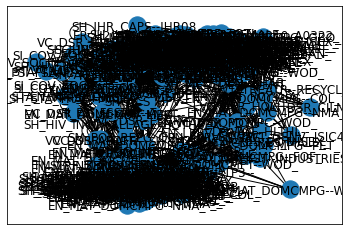

In [100]:
nx.draw_networkx(degCen,with_labels=True)

In [107]:
#POSITIVE DEGREE
dgCen=nx.degree_centrality(degCen)
pdCen=pd.DataFrame(dgCen.items(),columns=['SeriesCode', 'Positive Degree Centrality'])
pdCen

SeriesCode  Positive Degree Centrality
0                 SI_POV_DAY1--                    0.308642
1     SI_POV_EMP1--25+_BOTHSEX_                    0.403292
2     SI_POV_EMP1--15+_BOTHSEX_                    0.403292
3      SI_POV_EMP1--15+_FEMALE_                    0.403292
4      SI_POV_EMP1--25+_FEMALE_                    0.403292
..                          ...                         ...
239           FI_FSI_FSKRTC--A_                    0.242798
240  ER_H2O_WUEYST--INDUSTRIES_                    0.045267
241        EN_MAT_DOMCMPG--WCH_                    0.024691
242              EN_LKRV_PWAC--                    0.098765
243            FI_FSI_FSSNO--A_                    0.032922

[244 rows x 2 columns]

In [419]:
#NEGATIVE DEGREE
NdgCen=nx.degree_centrality(NdegCen)
NdCen=pd.DataFrame(NdgCen.items(),columns=['SeriesCode', 'Negative Degree Centrality'])
NdCen

SeriesCode  Negative Degree Centrality
0                  SI_POV_DAY1--                    0.242798
1    SH_HIV_INCD--ALLAGE_FEMALE_                    0.390947
2                  SH_ACS_DTP3--                    0.176955
3                DC_TOF_HLTHNT--                    0.292181
4            SH_IHR_CAPS--IHR08_                    0.090535
..                           ...                         ...
239             ST_EEV_ACCSEEA--                    0.251029
240             EN_MWT_COLLV--A_                    0.041152
241             FI_FSI_FSANL--A_                    0.032922
242          SH_IHR_CAPS--IHR06_                    0.234568
243          SH_IHR_CAPS--IHR01_                    0.234568

[244 rows x 2 columns]

# Closeness centrality

In [108]:
#POSITIVE CLOSENESS
clCen=nx.closeness_centrality(degCen)
pcCen=pd.DataFrame(clCen.items(),columns=['SeriesCode', 'Positive Closeness Centrality'])
pcCen

SeriesCode  Positive Closeness Centrality
0                 SI_POV_DAY1--                       0.501031
1     SI_POV_EMP1--25+_BOTHSEX_                       0.525974
2     SI_POV_EMP1--15+_BOTHSEX_                       0.525974
3      SI_POV_EMP1--15+_FEMALE_                       0.525974
4      SI_POV_EMP1--25+_FEMALE_                       0.525974
..                          ...                            ...
239           FI_FSI_FSKRTC--A_                       0.521459
240  ER_H2O_WUEYST--INDUSTRIES_                       0.442623
241        EN_MAT_DOMCMPG--WCH_                       0.377329
242              EN_LKRV_PWAC--                       0.471845
243            FI_FSI_FSSNO--A_                       0.451673

[244 rows x 2 columns]

In [420]:
#NEGATIVE CLOSENESS
NclCen=nx.closeness_centrality(NdegCen)
NcCen=pd.DataFrame(NclCen.items(),columns=['SeriesCode', 'Negative Closeness Centrality'])
NcCen

SeriesCode  Negative Closeness Centrality
0                  SI_POV_DAY1--                       0.534066
1    SH_HIV_INCD--ALLAGE_FEMALE_                       0.612091
2                  SH_ACS_DTP3--                       0.478346
3                DC_TOF_HLTHNT--                       0.543624
4            SH_IHR_CAPS--IHR08_                       0.482143
..                           ...                            ...
239             ST_EEV_ACCSEEA--                       0.549774
240             EN_MWT_COLLV--A_                       0.459357
241             FI_FSI_FSANL--A_                       0.405676
242          SH_IHR_CAPS--IHR06_                       0.542411
243          SH_IHR_CAPS--IHR01_                       0.542411

[244 rows x 2 columns]

# Betweenness centrality

In [109]:
#POSITIVE BETWEENNESS
btCen=nx.betweenness_centrality(degCen)
pbCen=pd.DataFrame(btCen.items(),columns=['SeriesCode', 'Positive Betweenness Centrality'])
pbCen

SeriesCode  Positive Betweenness Centrality
0                 SI_POV_DAY1--                         0.001270
1     SI_POV_EMP1--25+_BOTHSEX_                         0.001224
2     SI_POV_EMP1--15+_BOTHSEX_                         0.001224
3      SI_POV_EMP1--15+_FEMALE_                         0.001224
4      SI_POV_EMP1--25+_FEMALE_                         0.001224
..                          ...                              ...
239           FI_FSI_FSKRTC--A_                         0.010312
240  ER_H2O_WUEYST--INDUSTRIES_                         0.000871
241        EN_MAT_DOMCMPG--WCH_                         0.000009
242              EN_LKRV_PWAC--                         0.010936
243            FI_FSI_FSSNO--A_                         0.003156

[244 rows x 2 columns]

In [421]:
#NEGATIVE BETWEENNESS
NbtCen=nx.betweenness_centrality(NdegCen)
NbCen=pd.DataFrame(NbtCen.items(),columns=['SeriesCode', 'Negative Betweenness Centrality'])
NbCen

SeriesCode  Negative Betweenness Centrality
0                  SI_POV_DAY1--                         0.003370
1    SH_HIV_INCD--ALLAGE_FEMALE_                         0.004572
2                  SH_ACS_DTP3--                         0.003022
3                DC_TOF_HLTHNT--                         0.016491
4            SH_IHR_CAPS--IHR08_                         0.001327
..                           ...                              ...
239             ST_EEV_ACCSEEA--                         0.002787
240             EN_MWT_COLLV--A_                         0.000169
241             FI_FSI_FSANL--A_                         0.000083
242          SH_IHR_CAPS--IHR06_                         0.004641
243          SH_IHR_CAPS--IHR01_                         0.004641

[244 rows x 2 columns]

In [432]:
centFinal=pd.merge(centFinal,NcCen,on='SeriesCode')

In [433]:
centFinal.sort_values('Negative Centrality',ascending=False).iloc[:10,:]
#Want low closeness and high everything else

SeriesCode  Positive Centrality  Negative Centrality  \
195  SG_INT_MBRDEV--UNGA_             0.002083             0.093026   
196  SG_INT_MBRDEV--IBRD_             0.002083             0.093026   
197   SG_INT_MBRDEV--IMF_             0.002083             0.093026   
198   SG_INT_MBRDEV--IFC_             0.002083             0.093026   
201  SG_INT_VRTDEV--UNGA_             0.002083             0.093026   
231  EN_MAT_DOMCMPT--BIM_             0.001965             0.092151   
218  EN_MAT_DOMCMPT--FOF_             0.001903             0.091789   
219  EN_MAT_DOMCMPT--CRO_             0.001874             0.091669   
224  EN_MAT_DOMCMPT--ALP_             0.001971             0.091413   
222  EN_MAT_DOMCMPT--CPR_             0.001968             0.091321   

     Positive Betweenness Centrality  Positive Closeness Centrality  \
195                         0.002198                       0.481188   
196                         0.002198                       0.481188   
197                         0.002198                       0.481188   
198                         0.002198                       0.481188   
201                         0.002198                       0.481188   
231                         0.001069                       0.483101   
218                         0.001066                       0.475538   
219                         0.000861                       0.473684   
224                         0.001069                       0.483101   
222                         0.001069                       0.483101   

     Positive Degree Centrality  Negative Degree Centrality  \
195                    0.329218                    0.444444   
196                    0.329218                    0.444444   
197                    0.329218                    0.444444   
198                    0.329218                    0.444444   
201                    0.329218                    0.444444   
231                    0.320988                    0.415638   
218                    0.320988                    0.427984   
219                    0.316872                    0.411523   
224                    0.320988                    0.411523   
222                    0.320988                    0.415638   

     Negative Betweenness Centrality  Negative Closeness Centrality  
195                         0.008361                       0.637795  
196                         0.008361                       0.637795  
197                         0.008361                       0.637795  
198                         0.008361                       0.637795  
201                         0.008361                       0.637795  
231                         0.004414                       0.627907  
218                         0.005040                       0.634465  
219                         0.004128                       0.623077  
224                         0.004128                       0.623077  
222                         0.004414                       0.627907

# Centrality bar charts

In [434]:
top10Close=centFinal.sort_values('Positive Closeness Centrality',ascending=True).iloc[:15,[0,4]]
top10Bet=centFinal.sort_values('Positive Betweenness Centrality',ascending=False).iloc[:15,[0,3]]
top10Deg=centFinal.sort_values('Positive Degree Centrality',ascending=False).iloc[:15,[0,5]]
top10EigP=centFinal.sort_values('Positive Centrality',ascending=False).iloc[:15,[0,1]]
top10EigN=centFinal.sort_values('Negative Centrality',ascending=False).iloc[:15,[0,2]]
top10BetN=centFinal.sort_values('Negative Betweenness Centrality',ascending=False).iloc[:15,[0,7]]
top10CloseN=centFinal.sort_values('Negative Closeness Centrality',ascending=True).iloc[:15,[0,8]]
top10DegN=centFinal.sort_values('Negative Degree Centrality',ascending=False).iloc[:15,[0,6]]

<AxesSubplot:>

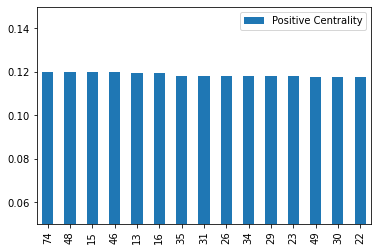

In [440]:
top10EigP.plot.bar(ylim=[0.05,0.15])

<AxesSubplot:>

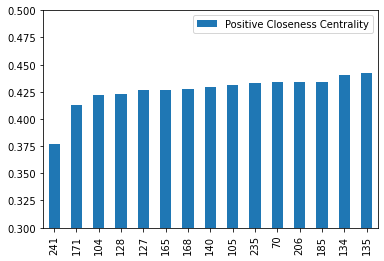

In [412]:
top10Close.plot.bar(ylim=[0.3,0.5])

<AxesSubplot:>

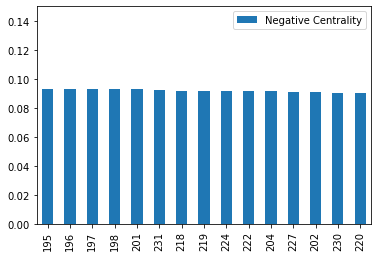

In [429]:
top10EigN.plot.bar(ylim=[0.0,0.15])

<AxesSubplot:>

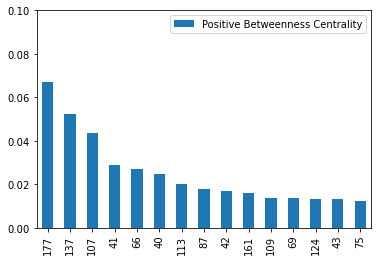

In [414]:
top10Bet.plot.bar(ylim=[0.0,0.1])

<AxesSubplot:>

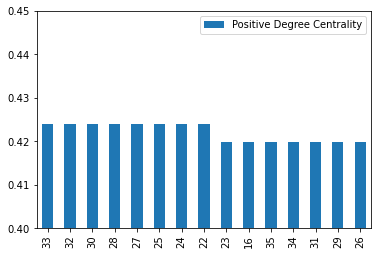

In [415]:
top10Deg.plot.bar(ylim=[0.4,0.45])

<AxesSubplot:>

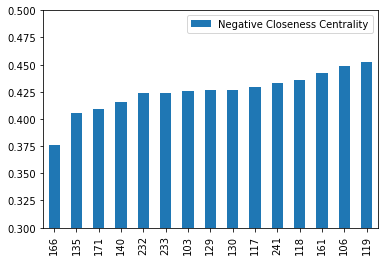

In [437]:
top10CloseN.plot.bar(ylim=[0.3,0.5])

<AxesSubplot:>

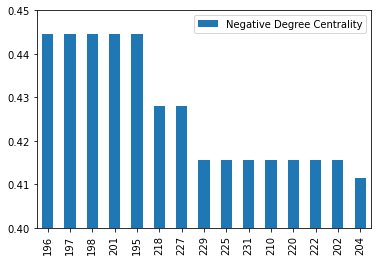

In [436]:
top10DegN.plot.bar(ylim=[0.4,0.45])

<AxesSubplot:>

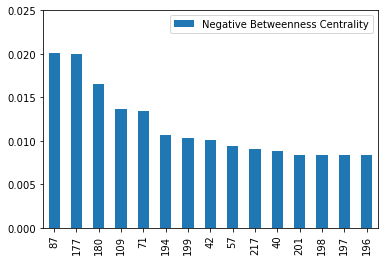

In [435]:
top10BetN.plot.bar(ylim=[0.0,0.025])

In [445]:
centFinal.iloc[177,:]

SeriesCode                         SG_INT_VRTDEV--FSB_
Positive Centrality                           0.008222
Negative Centrality                             0.0705
Positive Betweenness Centrality               0.067172
Positive Closeness Centrality                 0.524838
Positive Degree Centrality                    0.308642
Negative Degree Centrality                    0.386831
Negative Betweenness Centrality               0.019957
Negative Closeness Centrality                      0.6
Name: 177, dtype: object

In [451]:
corrmat.iloc[178,:].values

array([       nan, -0.8660254, -0.8660254, -0.8660254, -0.8660254,
       -0.8660254, -0.8660254, -0.8660254, -0.8660254, -0.8660254,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, -1.       , -1.       ,
       -0.8660254, -0.8660254, -0.8660254,  0.       ,  0.       ,
       -0.8660254, -0.8660254, -0.8660254, -0.8660254, -0.8660254,
       -0.8660254,  0.8660254,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, -0.8660254,
       -0.8660254, -1.       , -0.8660254, -0.8660254, -0.8660254,
       -0.8660254, -0.8660254, -0.8660254, -0.8660254, -0.8660254,
       -0.8660254, -0.8660254, -0.8660254, -0.8660254, -0.8660254,
       -0.8660254, -0.8660254,  0.8660254, -0.8660254, -1.       ,
       -0.8660254, -0.8660254,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [464]:
corrmat.iloc[135:155,:];

# Granger Causality Test

In [155]:
dataset=clnData.iloc[:,:5]

In [127]:
dataset.fillna(0,inplace=True)

In [158]:
dataset.dropna(axis=0,how='any',inplace=True)

In [159]:
dataset.columns=dataset.columns.get_level_values(1)

In [149]:
ds2=dataset.iloc[15:,:]

In [166]:
dataset.iloc[:,0]

2001   -11.5
2002   -10.2
2003   -11.0
2004    -9.7
2005    -8.6
2006    -7.2
2007    -6.7
2008    -5.5
2009    -5.4
2011    -4.7
2012    -3.7
2013    -3.1
2014    -2.7
2015    -3.2
2016    -3.9
Name: SI_POV_DAY1--, dtype: float64

In [257]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=3
test = 'ssr-chi2test'

def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
   
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
        
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
                    
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
                    
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset

#grangers_causality_matrix(dataset, variables = dataset.columns)

In [145]:
grangers_causality_matrix(dataset, variables = dataset.columns)

SI_POV_DAY1--_x  SI_POV_EMP1--25+_BOTHSEX__x  \
SI_POV_DAY1--_y                          1.0                       0.0036   
SI_POV_EMP1--25+_BOTHSEX__y              0.0                       1.0000   
SI_POV_EMP1--15+_BOTHSEX__y              0.0                       0.4734   
SI_POV_EMP1--15+_FEMALE__y               0.0                       0.3616   
SI_POV_EMP1--25+_FEMALE__y               0.0                       0.5537   

                             SI_POV_EMP1--15+_BOTHSEX__x  \
SI_POV_DAY1--_y                                   0.0013   
SI_POV_EMP1--25+_BOTHSEX__y                       0.5408   
SI_POV_EMP1--15+_BOTHSEX__y                       1.0000   
SI_POV_EMP1--15+_FEMALE__y                        0.4917   
SI_POV_EMP1--25+_FEMALE__y                        0.5790   

                             SI_POV_EMP1--15+_FEMALE__x  \
SI_POV_DAY1--_y                                  0.0016   
SI_POV_EMP1--25+_BOTHSEX__y                      0.4224   
SI_POV_EMP1--15+_BOTHSEX__y                      0.5896   
SI_POV_EMP1--15+_FEMALE__y                       1.0000   
SI_POV_EMP1--25+_FEMALE__y                       0.5099   

                             SI_POV_EMP1--25+_FEMALE__x  
SI_POV_DAY1--_y                                  0.0019  
SI_POV_EMP1--25+_BOTHSEX__y                      0.5960  
SI_POV_EMP1--15+_BOTHSEX__y                      0.5868  
SI_POV_EMP1--15+_FEMALE__y                       0.4713  
SI_POV_EMP1--25+_FEMALE__y                       1.0000

In [163]:
grangers_causality_matrix(dataset, variables = dataset.columns)

SI_POV_DAY1--_x  SI_POV_EMP1--25+_BOTHSEX__x  \
SI_POV_DAY1--_y                       1.0000                       0.0001   
SI_POV_EMP1--25+_BOTHSEX__y           0.0263                       1.0000   
SI_POV_EMP1--15+_BOTHSEX__y           0.0052                       0.0218   
SI_POV_EMP1--15+_FEMALE__y            0.3350                       0.0000   
SI_POV_EMP1--25+_FEMALE__y            0.0862                       0.0000   

                             SI_POV_EMP1--15+_BOTHSEX__x  \
SI_POV_DAY1--_y                                   0.0000   
SI_POV_EMP1--25+_BOTHSEX__y                       0.0021   
SI_POV_EMP1--15+_BOTHSEX__y                       1.0000   
SI_POV_EMP1--15+_FEMALE__y                        0.0000   
SI_POV_EMP1--25+_FEMALE__y                        0.0169   

                             SI_POV_EMP1--15+_FEMALE__x  \
SI_POV_DAY1--_y                                     0.0   
SI_POV_EMP1--25+_BOTHSEX__y                         0.0   
SI_POV_EMP1--15+_BOTHSEX__y                         0.0   
SI_POV_EMP1--15+_FEMALE__y                          1.0   
SI_POV_EMP1--25+_FEMALE__y                          0.0   

                             SI_POV_EMP1--25+_FEMALE__x  
SI_POV_DAY1--_y                                  0.0000  
SI_POV_EMP1--25+_BOTHSEX__y                      0.0000  
SI_POV_EMP1--15+_BOTHSEX__y                      0.0163  
SI_POV_EMP1--15+_FEMALE__y                       0.0000  
SI_POV_EMP1--25+_FEMALE__y                       1.0000

In [167]:
y=dataset.iloc[:,0]

In [168]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

regr = OLS(y, add_constant(X)).fit()
print(regr.aic)

NameError: name 'X' is not defined

Test if data stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [221]:
X=clnData.iloc[:,[0,1]]
X.dropna(inplace=True)

/Applications/miniconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [222]:
X

1.1.1                          
     SI_POV_DAY1-- SI_POV_EMP1--25+_BOTHSEX_
2001         -11.5                      -7.5
2002         -10.2                      -6.9
2003         -11.0                      -7.4
2004          -9.7                      -5.4
2005          -8.6                      -4.9
2006          -7.2                      -3.9
2007          -6.7                      -3.5
2008          -5.5                      -2.8
2009          -5.4                      -2.6
2011          -4.7                      -2.0
2012          -3.7                      -1.4
2013          -3.1                      -0.8
2014          -2.7                      -0.7
2015          -3.2                      -0.9
2016          -3.9                      -1.3

First order differencing

In [228]:
X_df=X.diff().dropna()
X_df

1.1.1                          
     SI_POV_DAY1-- SI_POV_EMP1--25+_BOTHSEX_
2002           1.3                       0.6
2003          -0.8                      -0.5
2004           1.3                       2.0
2005           1.1                       0.5
2006           1.4                       1.0
2007           0.5                       0.4
2008           1.2                       0.7
2009           0.1                       0.2
2011           0.7                       0.6
2012           1.0                       0.6
2013           0.6                       0.6
2014           0.4                       0.1
2015          -0.5                      -0.2
2016          -0.7                      -0.4

In [226]:
result = adfuller(X_df.iloc[:,0])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -0.8586182706814407
p-value: 0.8012945029241404
critical_values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
Series is not stationary


In [229]:
result = adfuller(X_df.iloc[:,1])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: 16.245387694462963
p-value: 1.0
critical_values: {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}
Series is not stationary


Second order differencing

In [252]:
X_2df.columns=X_2df.columns.get_level_values(1)

In [253]:
#X_2df=X_df.diff().dropna()
X_2df

SI_POV_DAY1--  SI_POV_EMP1--25+_BOTHSEX_
2003           -2.1              -1.100000e+00
2004            2.1               2.500000e+00
2005           -0.2              -1.500000e+00
2006            0.3               5.000000e-01
2007           -0.9              -6.000000e-01
2008            0.7               3.000000e-01
2009           -1.1              -5.000000e-01
2011            0.6               4.000000e-01
2012            0.3               0.000000e+00
2013           -0.4              -2.220446e-16
2014           -0.2              -5.000000e-01
2015           -0.9              -3.000000e-01
2016           -0.2              -2.000000e-01

In [239]:
X_2df=np.diff(X.iloc[:,0],n=2)

In [240]:
X_2df2=np.diff(X.iloc[:,1],n=2)

In [248]:
result = adfuller(X_2df.iloc[:,0])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -7.699618850072264
p-value: 1.3502046079330439e-11
critical_values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
Series is stationary


In [249]:
result = adfuller(X_2df.iloc[:,0])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -7.699618850072264
p-value: 1.3502046079330439e-11
critical_values: {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}
Series is stationary


Causality Test

In [243]:
[X_2df,X_2df2]

[array([-2.1,  2.1, -0.2,  0.3, -0.9,  0.7, -1.1,  0.6,  0.3, -0.4, -0.2,
        -0.9, -0.2]),
 array([-1.10000000e+00,  2.50000000e+00, -1.50000000e+00,  5.00000000e-01,
        -6.00000000e-01,  3.00000000e-01, -5.00000000e-01,  4.00000000e-01,
         0.00000000e+00, -2.22044605e-16, -5.00000000e-01, -3.00000000e-01,
        -2.00000000e-01])]

In [254]:
grangercausalitytests(X_2df[['SI_POV_DAY1--','SI_POV_EMP1--25+_BOTHSEX_']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6292  , p=0.4481  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=0.8389  , p=0.3597  , df=1
likelihood ratio test: chi2=0.8109  , p=0.3679  , df=1
parameter F test:         F=0.6292  , p=0.4481  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9224  , p=0.0814  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=14.3822 , p=0.0008  , df=2
likelihood ratio test: chi2=9.1977  , p=0.0101  , df=2
parameter F test:         F=3.9224  , p=0.0814  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8223  , p=0.5620  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=8.2233  , p=0.0416  , df=3
likelihood ratio test: chi2=6.0012  , p=0.1116  , df=3
parameter F test:         F=0.8223  , p=0.5620  , df_denom=3, df_num=3


{1: ({'ssr_ftest': (0.6291913984071595, 0.4480579238120335, 9.0, 1),
   'ssr_chi2test': (0.8389218645428795, 0.3597053002280084, 1),
   'lrtest': (0.8108961361497791, 0.3678554403562886, 1),
   'params_ftest': (0.6291913984071602, 0.4480579238120335, 9.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.922409212120546, 0.0813939187306239, 6.0, 2),
   'ssr_chi2test': (14.382167111108668, 0.0007532724655639547, 2),
   'lrtest': (9.197667296522663, 0.010063566560530042, 2),
   'params_ftest': (3.92240921212054, 0.08139391873062413, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.8223295634825332, 0.5619696162275465, 3.0, 3),
   'ssr_chi2test': (8.223295634825332, 0.04161538460478462, 3),
   'lrtest': (6.001156625481919, 0.11155396630887375, 3),
   'params_ftest': (0.8223295634825328, 0.5619696162275466, 3.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1.

In [255]:
grangercausalitytests(X_2df[['SI_POV_EMP1--25+_BOTHSEX_','SI_POV_DAY1--']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0648  , p=0.0746  , df_denom=9, df_num=1
ssr based chi2 test:   chi2=5.4197  , p=0.0199  , df=1
likelihood ratio test: chi2=4.4724  , p=0.0344  , df=1
parameter F test:         F=4.0648  , p=0.0746  , df_denom=9, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1770  , p=0.8420  , df_denom=6, df_num=2
ssr based chi2 test:   chi2=0.6488  , p=0.7230  , df=2
likelihood ratio test: chi2=0.6304  , p=0.7296  , df=2
parameter F test:         F=0.1770  , p=0.8420  , df_denom=6, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0899  , p=0.9608  , df_denom=3, df_num=3
ssr based chi2 test:   chi2=0.8992  , p=0.8256  , df=3
likelihood ratio test: chi2=0.8610  , p=0.8348  , df=3
parameter F test:         F=0.0899  , p=0.9608  , df_denom=3, df_num=3


{1: ({'ssr_ftest': (4.064785820969557, 0.07458636334466053, 9.0, 1),
   'ssr_chi2test': (5.419714427959409, 0.019910616248544007, 1),
   'lrtest': (4.472351137904003, 0.03444755937765272, 1),
   'params_ftest': (4.06478582096956, 0.07458636334466039, 9.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.1769507855917792, 0.8420391857149526, 6.0, 2),
   'ssr_chi2test': (0.6488195471698571, 0.7229539342489907, 2),
   'lrtest': (0.6304053322191017, 0.7296409857836135, 2),
   'params_ftest': (0.17695078559177813, 0.8420391857149538, 6.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.08991581306223903, 0.960784122575298, 3.0, 3),
   'ssr_chi2test': (0.8991581306223904, 0.8256309667609266, 3),
   'lrtest': (0.8610045753550324, 0.8348266153555198, 3),
   'params_ftest': (0.08991581306223917, 0.9607841225752978, 3.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1.

In [258]:
grangers_causality_matrix(X_2df, variables = X_2df.columns)

SI_POV_DAY1--_x  SI_POV_EMP1--25+_BOTHSEX__x
SI_POV_DAY1--_y                       1.0000                       0.0008
SI_POV_EMP1--25+_BOTHSEX__y           0.0199                       1.0000

# Community Detection Algorithms

In [278]:
from networkx.algorithms.community.centrality import girvan_newman

In [279]:
girvan_newman(posNtwk)

<generator object girvan_newman at 0x14ba90b30>

In [267]:
posNtwk.edges(data=True)

EdgeDataView([('SI_POV_DAY1--', 'SI_POV_EMP1--25+_BOTHSEX_', {'weight': 0.9964285714285714}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_BOTHSEX_', {'weight': 0.9955321222799309}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_FEMALE_', {'weight': 0.9955321222799309}), ('SI_POV_DAY1--', 'SI_POV_EMP1--25+_FEMALE_', {'weight': 0.9982126884730385}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_MALE_', {'weight': 0.9821428571428571}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_MALE_', {'weight': 0.9955321222799309}), ('SI_POV_DAY1--', 'SI_POV_EMP1--25+_MALE_', {'weight': 0.9946348652168627}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_BOTHSEX_', {'weight': 0.9865955682199674}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_FEMALE_', {'weight': 0.991057041960687}), ('SI_POV_DAY1--', 'SI_COV_LMKT--Q1_', {'weight': 0.7}), ('SI_POV_DAY1--', 'SI_COV_UEMP--BOTHSEX_', {'weight': 1.0}), ('SI_POV_DAY1--', 'SP_ACS_BSRVH2O--URBAN_', {'weight': 0.7676494735787385}), ('SI_POV_DAY1--', 'SP_ACS_BSRVH2O--RURAL_', {'weight': 0.9544239736040989}), ('

In [283]:
communities = girvan_newman(posNtwk)
 
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 

    print(node_groups)
    
color_map = []

for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()


SyntaxError: invalid non-printable character U+00A0 (2438734530.py, line 13)

In [284]:
communities = girvan_newman(posNtwk)

In [285]:
node_groups = []
for com in next(communities):
    node_groups.append(list(com))

KeyboardInterrupt: 

In [288]:
corrmat

1.1.1                            \
                                 SI_POV_DAY1-- SI_POV_EMP1--25+_BOTHSEX_   
1.1.1  SI_POV_DAY1--                  1.000000                  0.996429   
       SI_POV_EMP1--25+_BOTHSEX_      0.996429                  1.000000   
       SI_POV_EMP1--15+_BOTHSEX_      0.995532                  0.999387   
       SI_POV_EMP1--15+_FEMALE_       0.995532                  0.999387   
       SI_POV_EMP1--25+_FEMALE_       0.998213                  0.998774   
...                                        ...                       ...   
12.4.2 EN_TWT_GENV--ISIC4_T_          0.436364                  0.137363   
12.5.1 EN_MWT_RCYV--A_                0.609091                  0.503497   
12.a.1 EG_EGY_RNEW--                  0.950000                  0.975490   
12.b.1 ST_EEV_ACCSEEA--               0.763763                  0.866025   
       ST_EEV_ACCTSA--                     NaN                       NaN   

                                                            \
                                 SI_POV_EMP1--15+_BOTHSEX_   
1.1.1  SI_POV_DAY1--                              0.995532   
       SI_POV_EMP1--25+_BOTHSEX_                  0.999387   
       SI_POV_EMP1--15+_BOTHSEX_                  1.000000   
       SI_POV_EMP1--15+_FEMALE_                   1.000000   
       SI_POV_EMP1--25+_FEMALE_                   0.999386   
...                                                    ...   
12.4.2 EN_TWT_GENV--ISIC4_T_                      0.140303   
12.5.1 EN_MWT_RCYV--A_                            0.511384   
12.a.1 EG_EGY_RNEW--                              0.978541   
12.b.1 ST_EEV_ACCSEEA--                           0.869657   
       ST_EEV_ACCTSA--                                 NaN   

                                                           \
                                 SI_POV_EMP1--15+_FEMALE_   
1.1.1  SI_POV_DAY1--                             0.995532   
       SI_POV_EMP1--25+_BOTHSEX_                 0.999387   
       SI_POV_EMP1--15+_BOTHSEX_                 1.000000   
       SI_POV_EMP1--15+_FEMALE_                  1.000000   
       SI_POV_EMP1--25+_FEMALE_                  0.999386   
...                                                   ...   
12.4.2 EN_TWT_GENV--ISIC4_T_                     0.140303   
12.5.1 EN_MWT_RCYV--A_                           0.511384   
12.a.1 EG_EGY_RNEW--                             0.978541   
12.b.1 ST_EEV_ACCSEEA--                          0.869657   
       ST_EEV_ACCTSA--                                NaN   

                                                           \
                                 SI_POV_EMP1--25+_FEMALE_   
1.1.1  SI_POV_DAY1--                             0.998213   
       SI_POV_EMP1--25+_BOTHSEX_                 0.998774   
       SI_POV_EMP1--15+_BOTHSEX_                 0.999386   
       SI_POV_EMP1--15+_FEMALE_                  0.999386   
       SI_POV_EMP1--25+_FEMALE_                  1.000000   
...                                                   ...   
12.4.2 EN_TWT_GENV--ISIC4_T_                     0.140303   
12.5.1 EN_MWT_RCYV--A_                           0.511384   
12.a.1 EG_EGY_RNEW--                             0.974234   
12.b.1 ST_EEV_ACCSEEA--                          0.829667   
       ST_EEV_ACCTSA--                                NaN   

                                                           \
                                 SI_POV_EMP1--15-24_MALE_   
1.1.1  SI_POV_DAY1--                             0.982143   
       SI_POV_EMP1--25+_BOTHSEX_                 0.990196   
       SI_POV_EMP1--15+_BOTHSEX_                 0.992030   
       SI_POV_EMP1--15+_FEMALE_                  0.992030   
       SI_POV_EMP1--25+_FEMALE_                  0.991412   
...                                                   ...   
12.4.2 EN_TWT_GENV--ISIC4_T_                     0.142857   
12.5.1 EN_MWT_RCYV--A_                           0.517483   
12.a.1 EG_EGY_RNEW--                           

In [376]:
import itertools
k = 6
comp = girvan_newman(posNtwk)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities))

KeyboardInterrupt: 

In [326]:
corrmat.iloc[30:50,30:50]

1.5.1                       1.5.2  \
                                 VC_DSR_PDAN-- VC_DSR_PDYN-- VC_DSR_AGLH--   
1.5.1 VC_DSR_PDAN--                   1.000000     -0.972028     -0.309091   
      VC_DSR_PDYN--                  -0.972028      1.000000      0.430303   
1.5.2 VC_DSR_AGLH--                  -0.309091      0.430303      1.000000   
      VC_DSR_CILN--                  -0.733333      0.587879     -0.212121   
      VC_DSR_DDPA--                  -0.721212      0.624242      0.115152   
      VC_DSR_GDPLS--                 -0.793939      0.830303      0.757576   
      VC_DSR_HOLH--                  -0.721212      0.612121     -0.296970   
      VC_DSR_LSGP--                  -0.065101      0.110672      0.553361   
1.a.1 DC_ODA_POVLG--                       NaN           NaN           NaN   
1.a.2 SD_XPD_ESED--                  -0.139860      0.167832      0.430303   
3.1.1 SH_STA_MORT--FEMALE_           -0.217929      0.242534      0.310981   
3.1.2 SH_STA_BRTC--                  -0.221885      0.189676      0.368126   
3.2.1 SH_DYN_IMRT--<1Y_FEMALE_       -0.167832      0.146853      0.284848   
      SH_DYN_IMRT--<1Y_MALE_         -0.150613      0.133100      0.284848   
      SH_DYN_IMRT--<1Y_BOTHSEX_      -0.167832      0.146853      0.284848   
      SH_DYN_IMRTN--<1Y_FEMALE_      -0.167832      0.146853      0.284848   
      SH_DYN_IMRTN--<1Y_MALE_        -0.132867      0.118881      0.284848   
      SH_DYN_IMRTN--<1Y_BOTHSEX_     -0.167832      0.146853      0.284848   
      SH_DYN_MORT--<5Y_BOTHSEX_      -0.167832      0.146853      0.284848   
      SH_DYN_MORT--<5Y_MALE_         -0.150613      0.133100      0.284848   

                                                                             \
                                 VC_DSR_CILN-- VC_DSR_DDPA-- VC_DSR_GDPLS--   
1.5.1 VC_DSR_PDAN--                  -0.733333     -0.721212      -0.793939   
      VC_DSR_PDYN--                   0.587879      0.624242       0.830303   
1.5.2 VC_DSR_AGLH--                  -0.212121      0.115152       0.757576   
      VC_DSR_CILN--                   1.000000      0.454545       0.381818   
      VC_DSR_DDPA--                   0.454545      1.000000       0.563636   
      VC_DSR_GDPLS--                  0.381818      0.563636       1.000000   
      VC_DSR_HOLH--                   0.781818      0.721212       0.333333   
      VC_DSR_LSGP--                  -0.136713     -0.071611       0.468730   
1.a.1 DC_ODA_POVLG--                       NaN           NaN            NaN   
1.a.2 SD_XPD_ESED--                   0.200000      0.478788       0.539394   
3.1.1 SH_STA_MORT--FEMALE_            0.237809      0.487814       0.469521   
3.1.2 SH_STA_BRTC--                   0.239282      0.656491       0.546053   
3.2.1 SH_DYN_IMRT--<1Y_FEMALE_        0.187879      0.624242       0.430303   
      SH_DYN_IMRT--<1Y_MALE_          0.187879      0.624242       0.430303   
      SH_DYN_IMRT--<1Y_BOTHSEX_       0.187879      0.624242       0.430303   
      SH_DYN_IMRTN--<1Y_FEMALE_       0.187879      0.624242       0.430303   
      SH_DYN_IMRTN--<1Y_MALE_         0.187879      0.624242       0.430303   
      SH_DYN_IMRTN--<1Y_BOTHSEX_      0.187879      0.624242       0.430303   
      SH_DYN_MORT--<5Y_BOTHSEX_       0.187879      0.624242       0.430303   
      SH_DYN_MORT--<5Y_MALE_          0.187879      0.624242       0.430303   

                                                                      1.a.1  \
                                 VC_DSR_HOLH-- VC_DSR_LSGP-- DC_ODA_POVLG--   
1.5.1 VC_DSR_PDAN--                  -0.721212     -0.065101            NaN   
      VC_DSR_PDYN--                   0.612121      0.110672            NaN   
1.5.2 VC_DSR_AGLH--                  -0.296970      0.553361            NaN   
      VC_DSR_CILN--                   0.781818     -0.136713            NaN   
      VC_DSR_DDPA--                   0.721212     -0.071611            NaN   
      VC_DSR_GDPLS--            

## Creating test network

In [306]:
testNet=nx.Graph()
    
    #Get correlation matrix values (edges)
#netval=corrmat.iloc[0:100,0:100].values
netval=corrmat.values
    
    #Get correlation names (nodes)
#netnodes=corrmat.iloc[0:100,0:100].index
netnodes=corrmat.index
netNode = []

for j in range(0,len(netnodes)):
    netNode.append(netnodes[j][1])

for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netval[m,n]>0.7:
                testNet.add_edge(netNode[m],netNode[n],weight=netval[m,n])

In [357]:
testNet.edges(data=True)

EdgeDataView([('VC_DSR_PDYN--', 'VC_DSR_DDPA--', {'weight': 0.6242424242424243}), ('VC_DSR_PDYN--', 'VC_DSR_GDPLS--', {'weight': 0.8303030303030303}), ('VC_DSR_PDYN--', 'VC_DSR_HOLH--', {'weight': 0.6121212121212121}), ('VC_DSR_DDPA--', 'VC_DSR_HOLH--', {'weight': 0.7212121212121212}), ('VC_DSR_DDPA--', 'SH_STA_BRTC--', {'weight': 0.6564911374796383}), ('VC_DSR_DDPA--', 'SH_DYN_IMRT--<1Y_FEMALE_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_IMRT--<1Y_MALE_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_IMRT--<1Y_BOTHSEX_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_IMRTN--<1Y_FEMALE_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_IMRTN--<1Y_MALE_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_IMRTN--<1Y_BOTHSEX_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_MORT--<5Y_BOTHSEX_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_MORT--<5Y_MALE_', {'weight': 0.6242424242424243}), ('VC_DSR_GDPL

In [367]:
import itertools
k = 4
comp = girvan_newman(testNet)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities))

(['VC_DSR_AGLH--', 'VC_DSR_CILN--', 'VC_DSR_GDPLS--', 'VC_DSR_HOLH--', 'VC_DSR_PDYN--'], ['SD_XPD_ESED--', 'SH_DYN_IMRT--<1Y_BOTHSEX_', 'SH_DYN_IMRT--<1Y_FEMALE_', 'SH_DYN_IMRT--<1Y_MALE_', 'SH_DYN_IMRTN--<1Y_BOTHSEX_', 'SH_DYN_IMRTN--<1Y_FEMALE_', 'SH_DYN_IMRTN--<1Y_MALE_', 'SH_DYN_MORT--<5Y_BOTHSEX_', 'SH_DYN_MORT--<5Y_MALE_', 'SH_STA_BRTC--', 'SH_STA_MORT--FEMALE_', 'VC_DSR_DDPA--'])
(['VC_DSR_CILN--', 'VC_DSR_HOLH--', 'VC_DSR_PDYN--'], ['SD_XPD_ESED--', 'SH_DYN_IMRT--<1Y_BOTHSEX_', 'SH_DYN_IMRT--<1Y_FEMALE_', 'SH_DYN_IMRT--<1Y_MALE_', 'SH_DYN_IMRTN--<1Y_BOTHSEX_', 'SH_DYN_IMRTN--<1Y_FEMALE_', 'SH_DYN_IMRTN--<1Y_MALE_', 'SH_DYN_MORT--<5Y_BOTHSEX_', 'SH_DYN_MORT--<5Y_MALE_', 'SH_STA_BRTC--', 'SH_STA_MORT--FEMALE_', 'VC_DSR_DDPA--'], ['VC_DSR_AGLH--', 'VC_DSR_GDPLS--'])
(['VC_DSR_PDYN--'], ['SD_XPD_ESED--', 'SH_DYN_IMRT--<1Y_BOTHSEX_', 'SH_DYN_IMRT--<1Y_FEMALE_', 'SH_DYN_IMRT--<1Y_MALE_', 'SH_DYN_IMRTN--<1Y_BOTHSEX_', 'SH_DYN_IMRTN--<1Y_FEMALE_', 'SH_DYN_IMRTN--<1Y_MALE_', 'SH_DYN_MOR

In [340]:
communities = girvan_newman(testNet)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))

In [341]:
node_groups

[['VC_DSR_HOLH--',
  'VC_DSR_CILN--',
  'VC_DSR_PDYN--',
  'VC_DSR_AGLH--',
  'VC_DSR_GDPLS--'],
 ['SH_DYN_IMRTN--<1Y_BOTHSEX_',
  'SH_DYN_IMRT--<1Y_MALE_',
  'VC_DSR_DDPA--',
  'SH_DYN_IMRTN--<1Y_FEMALE_',
  'SH_STA_MORT--FEMALE_',
  'SH_DYN_IMRTN--<1Y_MALE_',
  'SH_DYN_MORT--<5Y_BOTHSEX_',
  'SH_DYN_MORT--<5Y_MALE_',
  'SH_DYN_IMRT--<1Y_BOTHSEX_',
  'SH_STA_BRTC--',
  'SD_XPD_ESED--',
  'SH_DYN_IMRT--<1Y_FEMALE_']]

In [338]:
from operator import itemgetter

edges = testNet.edges()
nx.set_edge_attributes(testNet, {(u, v): v for u, v in edges}, "weight")
def heaviest(testNet):
    u, v, w = max(testNet.edges(data="weight"), key=itemgetter(2))
    return (u, v)

comp = girvan_newman(testNet, most_valuable_edge=heaviest)
tuple(sorted(c) for c in next(comp))

(['SD_XPD_ESED--',
  'SH_DYN_IMRT--<1Y_BOTHSEX_',
  'SH_DYN_IMRT--<1Y_FEMALE_',
  'SH_DYN_IMRT--<1Y_MALE_',
  'SH_DYN_IMRTN--<1Y_BOTHSEX_',
  'SH_DYN_IMRTN--<1Y_FEMALE_',
  'SH_DYN_IMRTN--<1Y_MALE_',
  'SH_DYN_MORT--<5Y_BOTHSEX_',
  'SH_DYN_MORT--<5Y_MALE_',
  'SH_STA_BRTC--',
  'SH_STA_MORT--FEMALE_',
  'VC_DSR_AGLH--',
  'VC_DSR_DDPA--',
  'VC_DSR_GDPLS--',
  'VC_DSR_PDYN--'],
 ['VC_DSR_CILN--', 'VC_DSR_HOLH--'])

In [9]:
G=testNet
communities = girvan_newman(G)
 
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 
    print(node_groups)


NameError: name 'girvan_newman' is not defined

In [360]:
testNet.edges(data=True)

EdgeDataView([('VC_DSR_PDYN--', 'VC_DSR_DDPA--', {'weight': 0.6242424242424243}), ('VC_DSR_PDYN--', 'VC_DSR_GDPLS--', {'weight': 0.8303030303030303}), ('VC_DSR_PDYN--', 'VC_DSR_HOLH--', {'weight': 0.6121212121212121}), ('VC_DSR_DDPA--', 'VC_DSR_HOLH--', {'weight': 0.7212121212121212}), ('VC_DSR_DDPA--', 'SH_STA_BRTC--', {'weight': 0.6564911374796383}), ('VC_DSR_DDPA--', 'SH_DYN_IMRT--<1Y_FEMALE_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_IMRT--<1Y_MALE_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_IMRT--<1Y_BOTHSEX_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_IMRTN--<1Y_FEMALE_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_IMRTN--<1Y_MALE_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_IMRTN--<1Y_BOTHSEX_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_MORT--<5Y_BOTHSEX_', {'weight': 0.6242424242424243}), ('VC_DSR_DDPA--', 'SH_DYN_MORT--<5Y_MALE_', {'weight': 0.6242424242424243}), ('VC_DSR_GDPL

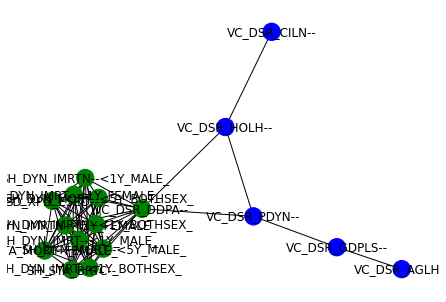

In [362]:
color_map = []

for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
        
nx.draw(G, node_color=color_map,  with_labels=True)
plt.show()

In [368]:
nodesGroup=(['VC_DSR_PDYN--'], ['SD_XPD_ESED--', 'SH_DYN_IMRT--<1Y_BOTHSEX_', 'SH_DYN_IMRT--<1Y_FEMALE_', 'SH_DYN_IMRT--<1Y_MALE_', 'SH_DYN_IMRTN--<1Y_BOTHSEX_', 'SH_DYN_IMRTN--<1Y_FEMALE_', 'SH_DYN_IMRTN--<1Y_MALE_', 'SH_DYN_MORT--<5Y_BOTHSEX_', 'SH_DYN_MORT--<5Y_MALE_', 'SH_STA_BRTC--', 'SH_STA_MORT--FEMALE_', 'VC_DSR_DDPA--'], ['VC_DSR_AGLH--', 'VC_DSR_GDPLS--'], ['VC_DSR_CILN--', 'VC_DSR_HOLH--'])

In [373]:
colourMap = ['blue','green','green','green','green','green','green','green','green','green','green','green','green','red','red','yellow','yellow']

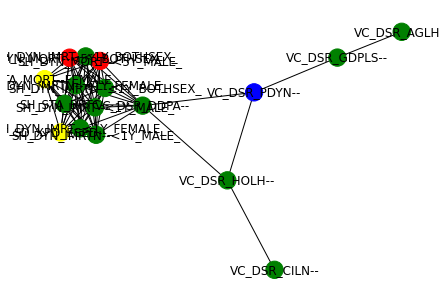

In [375]:
nx.draw(G, node_color=colourMap,  with_labels=True)

Infomap

In [50]:
cd.attribute_clustering

AttributeError: module 'cdlib' has no attribute 'attribute_clustering'

In [49]:
import cdlib as cd

In [146]:
G=testNet

In [ ]:
neo4j

# Community detection

In [77]:
from networkx.algorithms.community import kernighan_lin_bisection

In [80]:
kernighan_lin_bisection(G,weight='weight')

({'SD_XPD_ESED--',
  'SH_DYN_IMRT--<1Y_BOTHSEX_',
  'SH_DYN_IMRT--<1Y_FEMALE_',
  'SH_DYN_IMRT--<1Y_MALE_',
  'SH_DYN_IMRTN--<1Y_BOTHSEX_',
  'SH_DYN_IMRTN--<1Y_MALE_',
  'SH_DYN_MORT--<5Y_BOTHSEX_',
  'SH_DYN_MORT--<5Y_MALE_'},
 {'SH_DYN_IMRTN--<1Y_FEMALE_',
  'SH_STA_BRTC--',
  'SH_STA_MORT--FEMALE_',
  'VC_DSR_AGLH--',
  'VC_DSR_CILN--',
  'VC_DSR_DDPA--',
  'VC_DSR_GDPLS--',
  'VC_DSR_HOLH--',
  'VC_DSR_PDYN--'})

In [86]:
G=testNet
communities = k_clique_communities(G,2)
 
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 
    print(node_groups)


[['S', 'H', '_', 'D', 'Y', 'N', '_', 'I', 'M', 'R', 'T', '-', '-', '<', '1', 'Y', '_', 'M', 'A', 'L', 'E', '_']]
[['S', 'H', '_', 'D', 'Y', 'N', '_', 'I', 'M', 'R', 'T', '-', '-', '<', '1', 'Y', '_', 'M', 'A', 'L', 'E', '_'], ['S', 'D', '_', 'X', 'P', 'D', '_', 'E', 'S', 'E', 'D', '-', '-']]
[['S', 'H', '_', 'D', 'Y', 'N', '_', 'I', 'M', 'R', 'T', '-', '-', '<', '1', 'Y', '_', 'M', 'A', 'L', 'E', '_'], ['S', 'D', '_', 'X', 'P', 'D', '_', 'E', 'S', 'E', 'D', '-', '-'], ['V', 'C', '_', 'D', 'S', 'R', '_', 'C', 'I', 'L', 'N', '-', '-']]
[['S', 'H', '_', 'D', 'Y', 'N', '_', 'I', 'M', 'R', 'T', '-', '-', '<', '1', 'Y', '_', 'M', 'A', 'L', 'E', '_'], ['S', 'D', '_', 'X', 'P', 'D', '_', 'E', 'S', 'E', 'D', '-', '-'], ['V', 'C', '_', 'D', 'S', 'R', '_', 'C', 'I', 'L', 'N', '-', '-'], ['S', 'H', '_', 'D', 'Y', 'N', '_', 'M', 'O', 'R', 'T', '-', '-', '<', '5', 'Y', '_', 'M', 'A', 'L', 'E', '_']]
[['S', 'H', '_', 'D', 'Y', 'N', '_', 'I', 'M', 'R', 'T', '-', '-', '<', '1', 'Y', '_', 'M', 'A', 'L',

In [81]:
from networkx.algorithms.community import k_clique_communities

In [94]:
c=k_clique_communities(G,2)

In [91]:
list(c)

[frozenset({'SD_XPD_ESED--',
            'SH_DYN_IMRT--<1Y_BOTHSEX_',
            'SH_DYN_IMRT--<1Y_FEMALE_',
            'SH_DYN_IMRT--<1Y_MALE_',
            'SH_DYN_IMRTN--<1Y_BOTHSEX_',
            'SH_DYN_IMRTN--<1Y_FEMALE_',
            'SH_DYN_IMRTN--<1Y_MALE_',
            'SH_DYN_MORT--<5Y_BOTHSEX_',
            'SH_DYN_MORT--<5Y_MALE_',
            'SH_STA_BRTC--',
            'SH_STA_MORT--FEMALE_',
            'VC_DSR_DDPA--'})]

In [112]:
len(posNtwk.edges(data=True))

8099

In [109]:
len(posNtwk.nodes)

244

In [102]:
G.nodes

NodeView(('VC_DSR_PDYN--', 'VC_DSR_DDPA--', 'VC_DSR_GDPLS--', 'VC_DSR_HOLH--', 'VC_DSR_AGLH--', 'VC_DSR_CILN--', 'SH_STA_BRTC--', 'SH_DYN_IMRT--<1Y_FEMALE_', 'SH_DYN_IMRT--<1Y_MALE_', 'SH_DYN_IMRT--<1Y_BOTHSEX_', 'SH_DYN_IMRTN--<1Y_FEMALE_', 'SH_DYN_IMRTN--<1Y_MALE_', 'SH_DYN_IMRTN--<1Y_BOTHSEX_', 'SH_DYN_MORT--<5Y_BOTHSEX_', 'SH_DYN_MORT--<5Y_MALE_', 'SD_XPD_ESED--', 'SH_STA_MORT--FEMALE_'))

In [99]:
from networkx.algorithms.community import greedy_modularity_communities

In [103]:
list(greedy_modularity_communities(G,weight='weight'))

[frozenset({'SD_XPD_ESED--',
            'SH_DYN_IMRT--<1Y_BOTHSEX_',
            'SH_DYN_IMRT--<1Y_FEMALE_',
            'SH_DYN_IMRT--<1Y_MALE_',
            'SH_DYN_IMRTN--<1Y_BOTHSEX_',
            'SH_DYN_IMRTN--<1Y_FEMALE_',
            'SH_DYN_IMRTN--<1Y_MALE_',
            'SH_DYN_MORT--<5Y_BOTHSEX_',
            'SH_DYN_MORT--<5Y_MALE_',
            'SH_STA_BRTC--',
            'SH_STA_MORT--FEMALE_'}),
 frozenset({'VC_DSR_AGLH--',
            'VC_DSR_CILN--',
            'VC_DSR_DDPA--',
            'VC_DSR_GDPLS--',
            'VC_DSR_HOLH--',
            'VC_DSR_PDYN--'})]

In [305]:
greedy_modularity_communities(posNtwk,weight='weight',resolution=1.75)

[frozenset({'DC_TOF_HLTHL--',
            'DC_TOF_HLTHNT--',
            'EN_MAT_DOMCMPC--ALP_',
            'EN_MAT_DOMCMPC--BIM_',
            'EN_MAT_DOMCMPC--COL_',
            'EN_MAT_DOMCMPC--CPR_',
            'EN_MAT_DOMCMPC--CRO_',
            'EN_MAT_DOMCMPC--FEO_',
            'EN_MAT_DOMCMPC--FOF_',
            'EN_MAT_DOMCMPC--GAS_',
            'EN_MAT_DOMCMPC--GBO_',
            'EN_MAT_DOMCMPC--NFO_',
            'EN_MAT_DOMCMPC--NMA_',
            'EN_MAT_DOMCMPC--NMC_',
            'EN_MAT_DOMCMPC--NMM_',
            'EN_MAT_DOMCMPC--PET_',
            'EN_MAT_DOMCMPC--WCH_',
            'EN_MAT_DOMCMPC--WOD_',
            'EN_MAT_DOMCMPG--ALP_',
            'EN_MAT_DOMCMPG--BIM_',
            'EN_MAT_DOMCMPG--COL_',
            'EN_MAT_DOMCMPG--CPR_',
            'EN_MAT_DOMCMPG--CRO_',
            'EN_MAT_DOMCMPG--FEO_',
            'EN_MAT_DOMCMPG--FOF_',
            'EN_MAT_DOMCMPG--GAS_',
            'EN_MAT_DOMCMPG--NFO_',
            'EN_MAT_DOMCMPG--NMC_',
   

In [300]:
greedy_modularity_communities(testNet,weight=None,resolution=1)

[frozenset({'SD_XPD_ESED--',
            'SH_ACS_UNHC--',
            'SH_ALC_CONSPT--15+_A_BOTHSEX_',
            'SH_ALC_CONSPT--15+_A_FEMALE_',
            'SH_ALC_CONSPT--15+_A_MALE_',
            'SH_DTH_NCOM--30-70_BOTHSEX_',
            'SH_DTH_NCOM--30-70_FEMALE_',
            'SH_DTH_NCOM--30-70_MALE_',
            'SH_DYN_IMRT--<1Y_BOTHSEX_',
            'SH_DYN_IMRT--<1Y_FEMALE_',
            'SH_DYN_IMRT--<1Y_MALE_',
            'SH_DYN_IMRTN--<1Y_BOTHSEX_',
            'SH_DYN_IMRTN--<1Y_FEMALE_',
            'SH_DYN_IMRTN--<1Y_MALE_',
            'SH_DYN_MORT--<5Y_BOTHSEX_',
            'SH_DYN_MORT--<5Y_FEMALE_',
            'SH_DYN_MORT--<5Y_MALE_',
            'SH_DYN_MORTN--<5Y_BOTHSEX_',
            'SH_DYN_MORTN--<5Y_FEMALE_',
            'SH_DYN_MORTN--<5Y_MALE_',
            'SH_DYN_NMRT--<1M_BOTHSEX_',
            'SH_DYN_NMRTN--<1M_BOTHSEX_',
            'SH_PRV_SMOK--15+_BOTHSEX_',
            'SH_PRV_SMOK--15+_FEMALE_',
            'SH_PRV_SMOK--15+_MALE_',
  

In [185]:
from networkx.algorithms.community import asyn_lpa_communities

In [187]:
list(asyn_lpa_communities(G,weight='weight'))

[{'VC_DSR_AGLH--', 'VC_DSR_GDPLS--', 'VC_DSR_PDYN--'},
 {'SD_XPD_ESED--',
  'SH_DYN_IMRT--<1Y_BOTHSEX_',
  'SH_DYN_IMRT--<1Y_FEMALE_',
  'SH_DYN_IMRT--<1Y_MALE_',
  'SH_DYN_IMRTN--<1Y_BOTHSEX_',
  'SH_DYN_IMRTN--<1Y_FEMALE_',
  'SH_DYN_IMRTN--<1Y_MALE_',
  'SH_DYN_MORT--<5Y_BOTHSEX_',
  'SH_DYN_MORT--<5Y_MALE_',
  'SH_STA_BRTC--',
  'SH_STA_MORT--FEMALE_',
  'VC_DSR_DDPA--'},
 {'VC_DSR_CILN--', 'VC_DSR_HOLH--'}]

In [730]:
indData.loc[indData['SeriesCode']==input('Enter Series Code: ')].dropna(axis=1,how='all',inplace=False)

Enter Series Code: VC_DSR_PDYN


Goal Target Indicator   SeriesCode  \
424     1    1.5     1.5.1  VC_DSR_PDYN   
103    11   11.5    11.5.1  VC_DSR_PDYN   

                                     SeriesDescription   Units  
424  Number of people whose destroyed dwellings wer...  NUMBER  
103  Number of people whose destroyed dwellings wer...  NUMBER

Local expansion, label propagation, link partitioning [9] and overlap matrix (overlapping algorithm)
ESCA

In [220]:
from cdlib import algorithms

In [230]:
coms = algorithms.angel(G, threshold=1, min_community_size=3)

In [222]:
list(coms)

TypeError: 'NodeClustering' object is not iterable

In [531]:
#coms = algorithms.conga(G,number_communities=3)
#coms = algorithms.congo(testNet,number_communities=10)
#coms = algorithms.dpclus(G,weights='weight',d_threshold=0.5,cp_threshold=0.5)
#coms = algorithms.graph_entropy(G,weights='weight')
#coms = algorithms.ipca(G,weights='weight')
#coms = algorithms.wCommunity(G,weightName='weight')
#coms = algorithms.label_propagation(G)
#coms = algorithms.louvain(G,weight='weight')

In [746]:
coms = algorithms.leiden(G,weights='weight')

In [928]:
coms = algorithms.walktrap(G)

In [770]:
coms = algorithms.greedy_modularity(G,weight='weight')

In [927]:
G=nx.Graph()
    
    #Get correlation matrix values (edges)
#netval=corrmat.iloc[0:100,0:100].values
netval=corrmat.values
    
    #Get correlation names (nodes)
#netnodes=corrmat.iloc[0:100,0:100].index
netnodes=corrmat.index
netNode = []

for j in range(0,len(netnodes)):
    netNode.append(netnodes[j][1])

for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netNode[m]!=netNode[n]:
                if netval[m,n]>0.6:
                    G.add_edge(netNode[m],netNode[n],weight=netval[m,n])

In [868]:
'VC_DSR_MTMP--'=='VC_DSR_MTMP-'

False

In [862]:
G.edges(data=True)

EdgeDataView([('SI_POV_DAY1--', 'SI_COV_UEMP--BOTHSEX_', {'weight': 1.0}), ('SI_COV_UEMP--BOTHSEX_', 'SH_MED_DEN--PHAR_', {'weight': 1.0}), ('SI_COV_UEMP--BOTHSEX_', 'EN_TWT_GENV--ISIC4_F_', {'weight': 1.0}), ('SI_POV_EMP1--25+_BOTHSEX_', 'SH_DTH_NCOM--30-70_MALE_', {'weight': 1.0}), ('SI_POV_EMP1--25+_BOTHSEX_', 'SH_DTH_NCOM--30-70_FEMALE_', {'weight': 1.0}), ('SI_POV_EMP1--25+_BOTHSEX_', 'SH_DTH_NCOM--30-70_BOTHSEX_', {'weight': 1.0}), ('SI_POV_EMP1--25+_BOTHSEX_', 'SH_ACS_UNHC--', {'weight': 1.0}), ('SH_DTH_NCOM--30-70_MALE_', 'SI_POV_EMP1--15+_BOTHSEX_', {'weight': 1.0}), ('SH_DTH_NCOM--30-70_MALE_', 'SI_POV_EMP1--15+_FEMALE_', {'weight': 1.0}), ('SH_DTH_NCOM--30-70_MALE_', 'SI_POV_EMP1--25+_FEMALE_', {'weight': 1.0}), ('SH_DTH_NCOM--30-70_MALE_', 'SI_POV_EMP1--15-24_MALE_', {'weight': 1.0}), ('SH_DTH_NCOM--30-70_MALE_', 'SI_POV_EMP1--15+_MALE_', {'weight': 1.0}), ('SH_DTH_NCOM--30-70_MALE_', 'SI_POV_EMP1--25+_MALE_', {'weight': 1.0}), ('SH_DTH_NCOM--30-70_MALE_', 'SI_POV_EMP1--15-

In [850]:
Total = 0

for x in range(0,len(coms.communities)):
    print(len(coms.communities[x]))
    Total = Total + len(coms.communities[x])
print('Total',Total)

110
87
38
9
Total 244


In [915]:
print(coms.method_name)
print(len(coms.communities), 'Communities')
print(coms.method_parameters)  # Clustering parameters)
print(coms.communities)
print(coms.overlap)
print(coms.node_coverage)

Walktrap
3 Communities
{'': ''}
[['SI_POV_DAY1--', 'SI_POV_EMP1--25+_BOTHSEX_', 'SI_POV_EMP1--15+_BOTHSEX_', 'SI_POV_EMP1--15+_FEMALE_', 'SI_POV_EMP1--25+_FEMALE_', 'SI_POV_EMP1--15-24_MALE_', 'SI_POV_EMP1--15+_MALE_', 'SI_POV_EMP1--25+_MALE_', 'SI_POV_EMP1--15-24_BOTHSEX_', 'SI_POV_EMP1--15-24_FEMALE_', 'SI_COV_LMKT--Q1_', 'SI_COV_UEMP--BOTHSEX_', 'SP_ACS_BSRVH2O--URBAN_', 'SP_ACS_BSRVH2O--RURAL_', 'SP_ACS_BSRVH2O--ALLAREA_', 'SP_ACS_BSRVSAN--RURAL_', 'SP_ACS_BSRVSAN--ALLAREA_', 'SP_ACS_BSRVSAN--URBAN_', 'VC_DSR_DDPA--', 'SD_XPD_ESED--', 'SH_STA_MORT--FEMALE_', 'SH_STA_BRTC--', 'SH_DYN_IMRT--<1Y_FEMALE_', 'SH_DYN_IMRT--<1Y_MALE_', 'SH_DYN_IMRT--<1Y_BOTHSEX_', 'SH_DYN_IMRTN--<1Y_FEMALE_', 'SH_DYN_IMRTN--<1Y_MALE_', 'SH_DYN_IMRTN--<1Y_BOTHSEX_', 'SH_DYN_MORT--<5Y_BOTHSEX_', 'SH_DYN_MORT--<5Y_MALE_', 'SH_DYN_MORT--<5Y_FEMALE_', 'SH_DYN_MORTN--<5Y_MALE_', 'SH_DYN_MORTN--<5Y_FEMALE_', 'SH_DYN_MORTN--<5Y_BOTHSEX_', 'SH_DYN_NMRT--<1M_BOTHSEX_', 'SH_DYN_NMRTN--<1M_BOTHSEX_', 'SH_TBS_INCD--', 

In [298]:
len(coms.communities)

4

In [262]:
indicat=indData.iloc[:,0:4].drop_duplicates()

In [268]:
indGoal1=indicat.loc[indicat['Goal']==1]
indGoal3=indicat.loc[indicat['Goal']==3]
indGoal6=indicat.loc[indicat['Goal']==6]
indGoal10=indicat.loc[indicat['Goal']==10]
indGoal11=indicat.loc[indicat['Goal']==11]
indGoal12=indicat.loc[indicat['Goal']==12]

In [419]:
indDis1=indData.loc[indData['Goal']==1]
indDis3=indData.loc[indData['Goal']==3]
indDis6=indData.loc[indData['Goal']==6]
indDis10=indData.loc[indData['Goal']==10]
indDis11=indData.loc[indData['Goal']==11]
indDis12=indData.loc[indData['Goal']==12]

In [491]:
indData.loc[indData['Indicator']=='11.5.1'];

In [744]:
indGoal11;

In [609]:
indicatorsGoal1=corrmat.dropna(how='all').index.get_level_values(1)[:39]
indicatorsGoal3=corrmat.dropna(how='all').index.get_level_values(1)[39:118]
indicatorsGoal6=corrmat.dropna(how='all').index.get_level_values(1)[118:149]
indicatorsGoal10=corrmat.dropna(how='all').index.get_level_values(1)[149:182]
indicatorsGoal11=corrmat.dropna(how='all').index.get_level_values(1)[182:201]
indicatorsGoal12=corrmat.dropna(how='all').index.get_level_values(1)[201:259]

In [743]:
corrmat.dropna(how='all').index[201:259];

In [758]:
query = coms.communities
query[5]

IndexError: list index out of range

In [642]:
lists = [indicatorsGoal1,indicatorsGoal3,indicatorsGoal6,indicatorsGoal10,indicatorsGoal11,indicatorsGoal12]

In [643]:
from random import random
from functools import reduce

def fake_levenshtein(word1, word2):
    return random()

def avg_list(l):
        return reduce(lambda x, y: x + y, l) / len(l)

for l in lists:
    score = []
    for w1 in l:
        for w2 in query:
            score.append(fake_levenshtein(w1, w2))
    print(avg_list(score))

0.5033062827729352
0.4909633862283104
0.49004131648871746
0.4882046886552168
0.5436369405293321
0.5079437752664593


In [674]:
duplicated = [i for i in query if i in lists[5]]

In [675]:
print(duplicated)

['EN_MAT_DOMCMPC--WOD_', 'EN_MAT_DOMCMPG--PET_', 'EN_MAT_DOMCMPG--FOF_', 'EN_MAT_DOMCMPG--WCH_']


In [706]:
similarity = []
OVRsimilarity = []

In [912]:
query = coms.communities
OVRsimilarity = []
#OVRclassification = []

for x in range(0,len(query)):
    similarity = []
    classification = []
    for y in range(0,len(lists)):
        duplicated = [i for i in query[x] if i in lists[y]]
        similarity.append((len(duplicated)/len(query[x]))*100)
        #classification.append((len(duplicated)/len(lists[y]))*100)
    OVRsimilarity.append(similarity)
    #OVRclassification.append(classification)

In [913]:
OVRsimilarity

[[19.090909090909093,
  43.63636363636363,
  20.909090909090907,
  8.181818181818182,
  5.454545454545454,
  4.545454545454546],
 [2.1052631578947367,
  25.263157894736842,
  7.368421052631578,
  18.947368421052634,
  2.1052631578947367,
  46.31578947368421],
 [41.02564102564102,
  17.94871794871795,
  2.564102564102564,
  15.384615384615385,
  28.205128205128204,
  23.076923076923077]]

In [909]:
OVRsimilarity

[[16.51376146788991,
  44.03669724770643,
  21.100917431192663,
  9.174311926605505,
  3.669724770642202,
  5.5045871559633035],
 [2.2988505747126435,
  22.988505747126435,
  8.045977011494253,
  20.689655172413794,
  2.2988505747126435,
  45.97701149425287],
 [48.717948717948715,
  17.94871794871795,
  0.0,
  12.82051282051282,
  33.33333333333333,
  20.51282051282051],
 [0.0, 44.44444444444444, 11.11111111111111, 0.0, 0.0, 44.44444444444444]]

In [906]:
OVRclassification

[[46.15384615384615,
  50.63291139240506,
  58.06451612903226,
  27.27272727272727,
  21.052631578947366,
  8.620689655172415],
 [5.128205128205128,
  24.050632911392405,
  25.806451612903224,
  51.515151515151516,
  10.526315789473683,
  68.96551724137932],
 [33.33333333333333,
  17.72151898734177,
  3.225806451612903,
  18.181818181818183,
  57.89473684210527,
  15.517241379310345],
 [0.0, 7.59493670886076, 12.903225806451612, 0.0, 0.0, 6.896551724137931],
 [10.256410256410255, 0.0, 0.0, 3.0303030303030303, 0.0, 0.0],
 [2.564102564102564, 0.0, 0.0, 0.0, 5.263157894736842, 0.0],
 [2.564102564102564, 0.0, 0.0, 0.0, 5.263157894736842, 0.0]]

In [873]:
len(G.edges)

6946

In [886]:
pos2=nx.spring_layout(G)

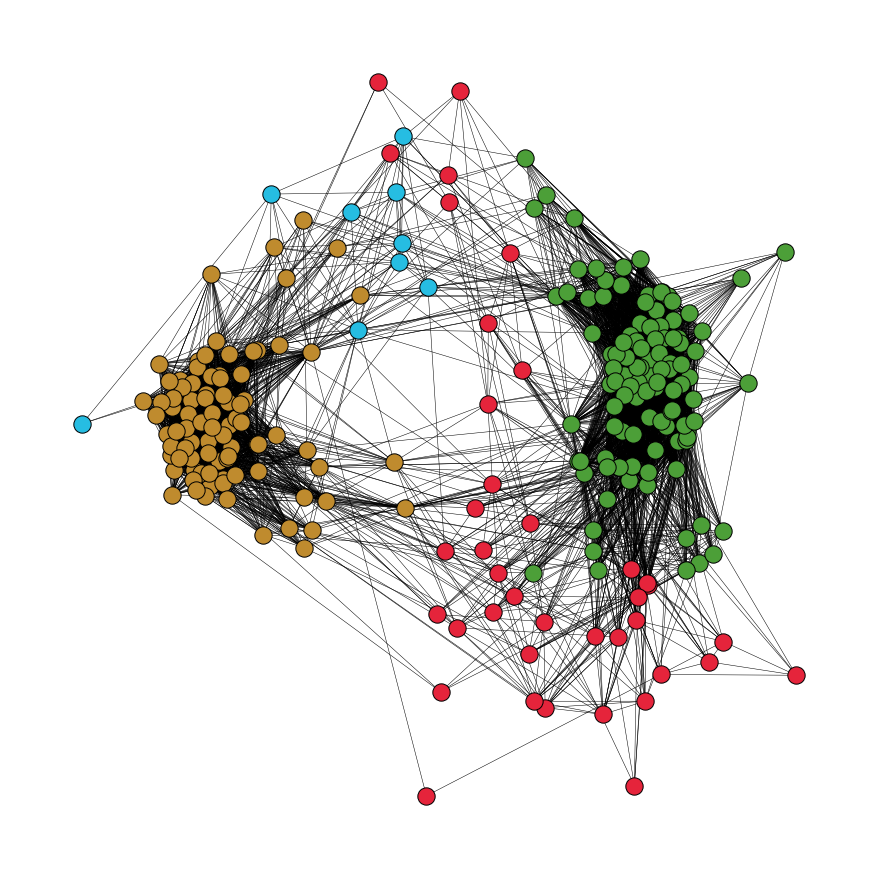

In [926]:
#0.7 correlation
plt.figure(1,figsize=(12,12))
nx.draw(G, pos, edge_color='k',  with_labels=False,
         font_weight='light', node_size= 100, width= 0.5)
nx.draw_networkx_nodes(G, pos, nodelist=coms.communities[0] ,node_color='#4C9F38').set_edgecolor('black')
nx.draw_networkx_nodes(G, pos, nodelist=coms.communities[1], node_color='#BF8B2E').set_edgecolor('black')
nx.draw_networkx_nodes(G, pos, nodelist=coms.communities[2], node_color='#E5243B').set_edgecolor('black')
nx.draw_networkx_nodes(G, pos, nodelist=coms.communities[3], node_color='#26BDE2').set_edgecolor('black')
plt.show()

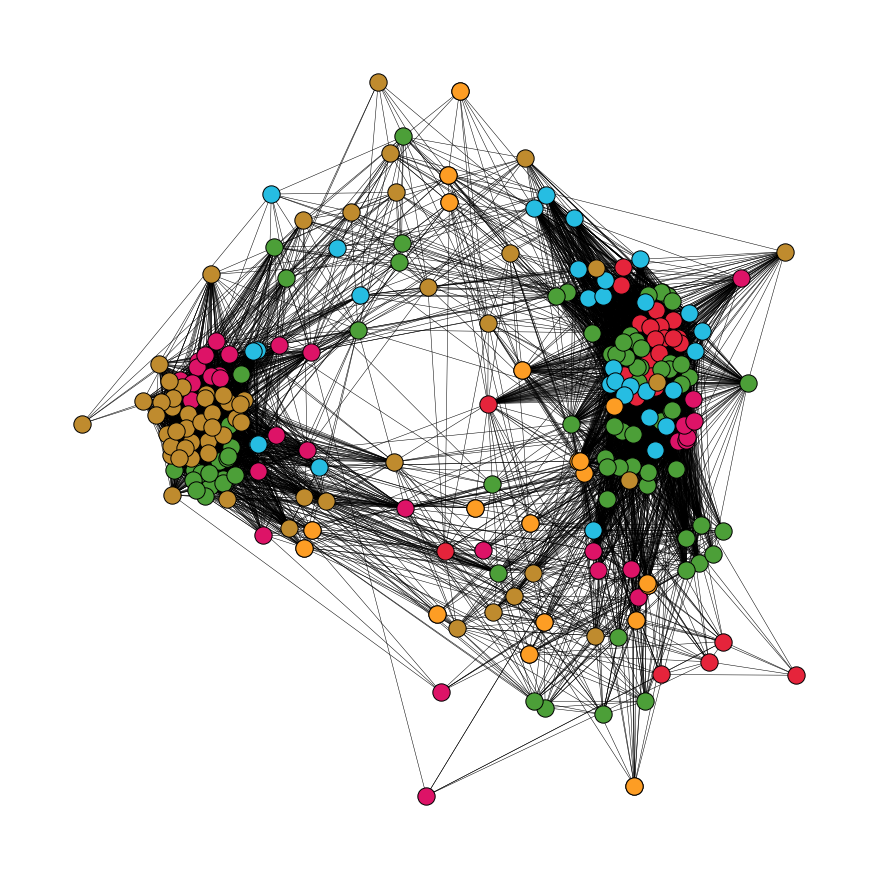

In [930]:
#Actual Goal split
plt.figure(1,figsize=(12,12))
nx.draw(G, pos, edge_color='k',  with_labels=False,
         font_weight='light', node_size= 100, width= 0.5)
nx.draw_networkx_nodes(G, pos, nodelist=lists[0] ,node_color='#E5243B').set_edgecolor('black')
nx.draw_networkx_nodes(G, pos, nodelist=lists[1], node_color='#4C9F38').set_edgecolor('black')
nx.draw_networkx_nodes(G, pos, nodelist=lists[2], node_color='#26BDE2').set_edgecolor('black')
nx.draw_networkx_nodes(G, pos, nodelist=lists[3], node_color='#DD1367').set_edgecolor('black')
nx.draw_networkx_nodes(G, pos, nodelist=lists[4], node_color='#FD9D24').set_edgecolor('black')
nx.draw_networkx_nodes(G, pos, nodelist=lists[5], node_color='#BF8B2E').set_edgecolor('black')
plt.show()

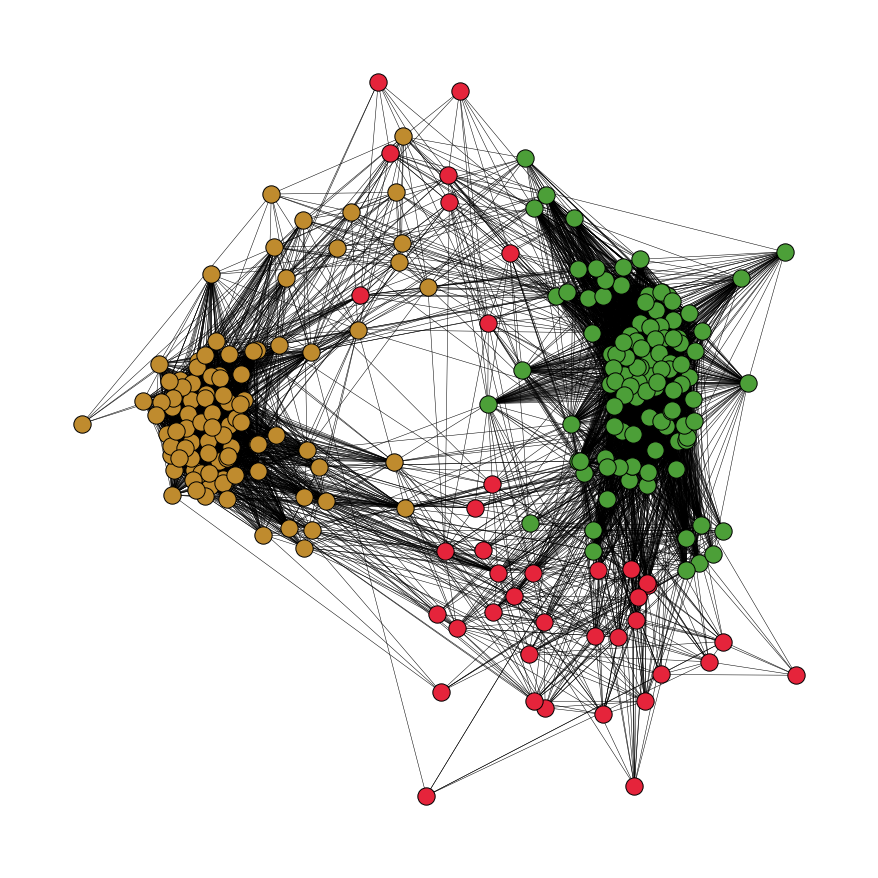

In [929]:
#0.6 correlation
plt.figure(1,figsize=(12,12))
nx.draw(G, pos, edge_color='k',  with_labels=False,
         font_weight='light', node_size= 100, width= 0.5)
nx.draw_networkx_nodes(G, pos, nodelist=coms.communities[0] ,node_color='#4C9F38').set_edgecolor('black')
nx.draw_networkx_nodes(G, pos, nodelist=coms.communities[1], node_color='#BF8B2E').set_edgecolor('black')
nx.draw_networkx_nodes(G, pos, nodelist=coms.communities[2], node_color='#E5243B').set_edgecolor('black')
plt.show()

# Centrality and Node Evaluation

First look at eigenvector centrality, get top 5 nodes and create graph of nodes (coloured by SDG colouring)

In [1088]:
posBar=centOVR.sort_values('Positive Centrality',ascending=False).iloc[:200,:2]

In [1092]:
negBar=centOVR.sort_values('Negative Centrality',ascending=False).iloc[:200,[0,2]]

In [1060]:
H=nx.Graph()
    
    #Get correlation matrix values (edges)
#netval=corrmat.iloc[0:30,0:30].values
netval=corrmat.values
    
    #Get correlation names (nodes)
#netnodes=corrmat.iloc[0:30,0:30].index
netnodes=corrmat.index
netNode = []

for j in range(0,len(netnodes)):
    netNode.append(netnodes[j][1])

for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netNode[m]!=netNode[n]:
                if netNode[m]=='VC_DSR_AGLH--' or netNode[n]=='VC_DSR_AGLH--':
                        H.add_edge(netNode[m],netNode[n],weight=abs(netval[m,n]))

In [1061]:
C=nx.Graph()
    
    #Get correlation matrix values (edges)
#netval=corrmat.iloc[0:30,0:30].values
netval=corrmat.values
    
    #Get correlation names (nodes)
#netnodes=corrmat.iloc[0:30,0:30].index
netnodes=corrmat.index
netNode = []

for j in range(0,len(netnodes)):
    netNode.append(netnodes[j][1])

for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netNode[m]!=netNode[n]:
                if netNode[m]=='VC_DSR_AGLH--' or netNode[n]=='VC_DSR_AGLH--':
                    if netval[m,n]>0.6:
                        C.add_edge(netNode[m],netNode[n],weight=abs(netval[m,n]))

In [1062]:
K=nx.Graph()
    
    #Get correlation matrix values (edges)
#netval=corrmat.iloc[0:30,0:30].values
netval=corrmat.values
    
    #Get correlation names (nodes)
#netnodes=corrmat.iloc[0:30,0:30].index
netnodes=corrmat.index
netNode = []

for j in range(0,len(netnodes)):
    netNode.append(netnodes[j][1])

for m in range(0,len(netNode)):
        for n in range(1+m,len(netNode)):
            if netNode[m]!=netNode[n]:
                if netNode[m]=='VC_DSR_AGLH--' or netNode[n]=='VC_DSR_AGLH--':
                    if netval[m,n]<-0.6:
                        K.add_edge(netNode[m],netNode[n],weight=abs(netval[m,n]))

In [1063]:
pos2=nx.spring_layout(H)
#pos3=nx.spring_layout(K)

In [1065]:
C.edges(data=True);

<AxesSubplot:>

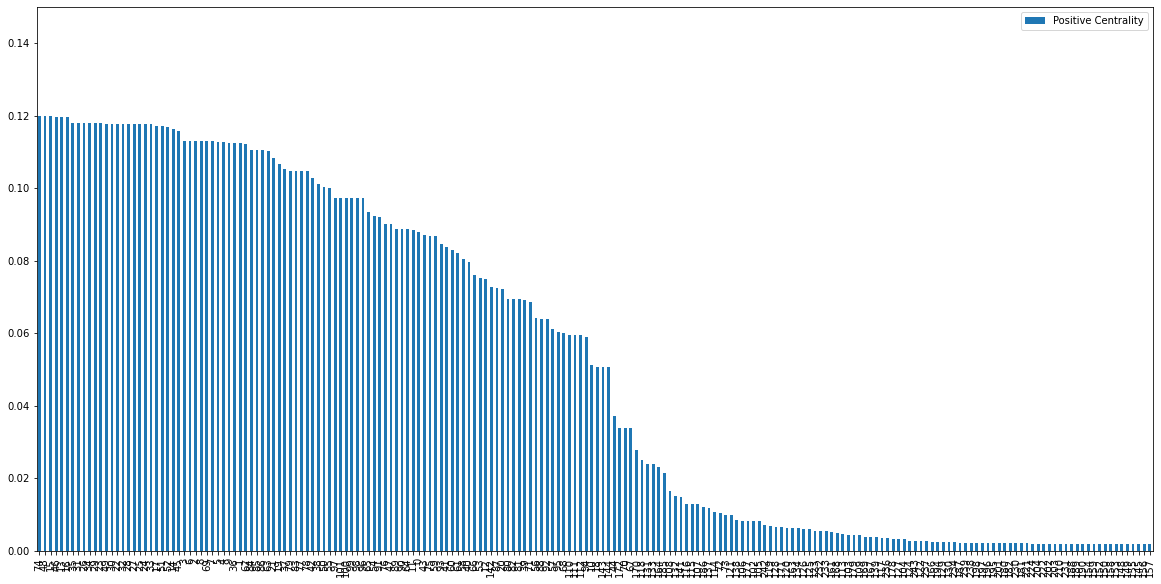

In [1091]:
#Top 50 positive eigenvector centrality
posBar.plot.bar(ylim=[0.0,0.15],figsize=(20,10))

<AxesSubplot:>

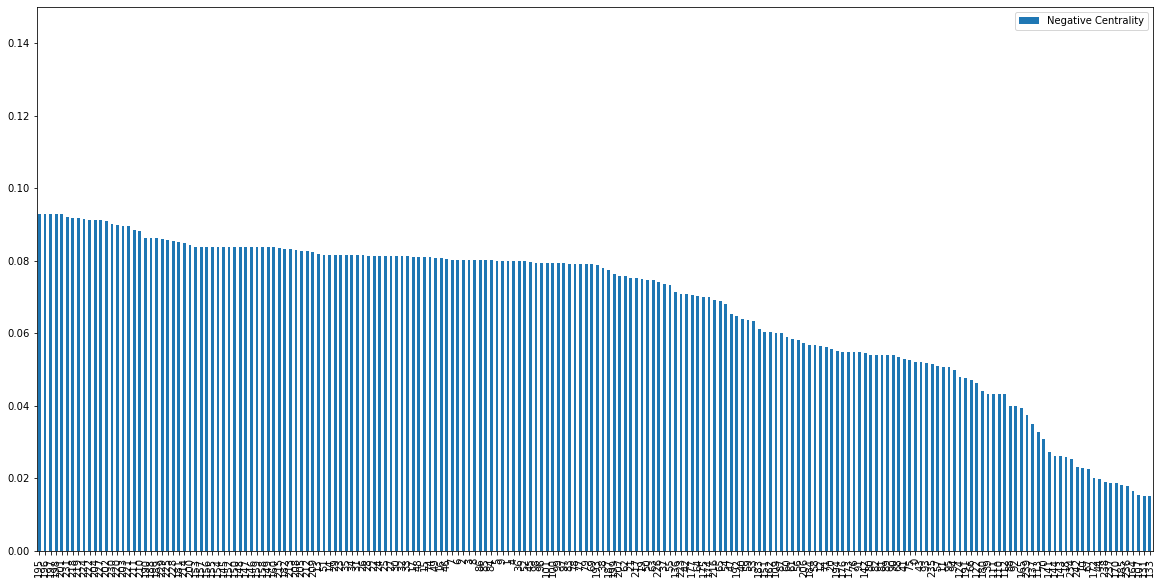

In [1094]:
#Top 50 negative eigenvector centrality
negBar.plot.bar(ylim=[0.00,0.15],figsize=(20,10))

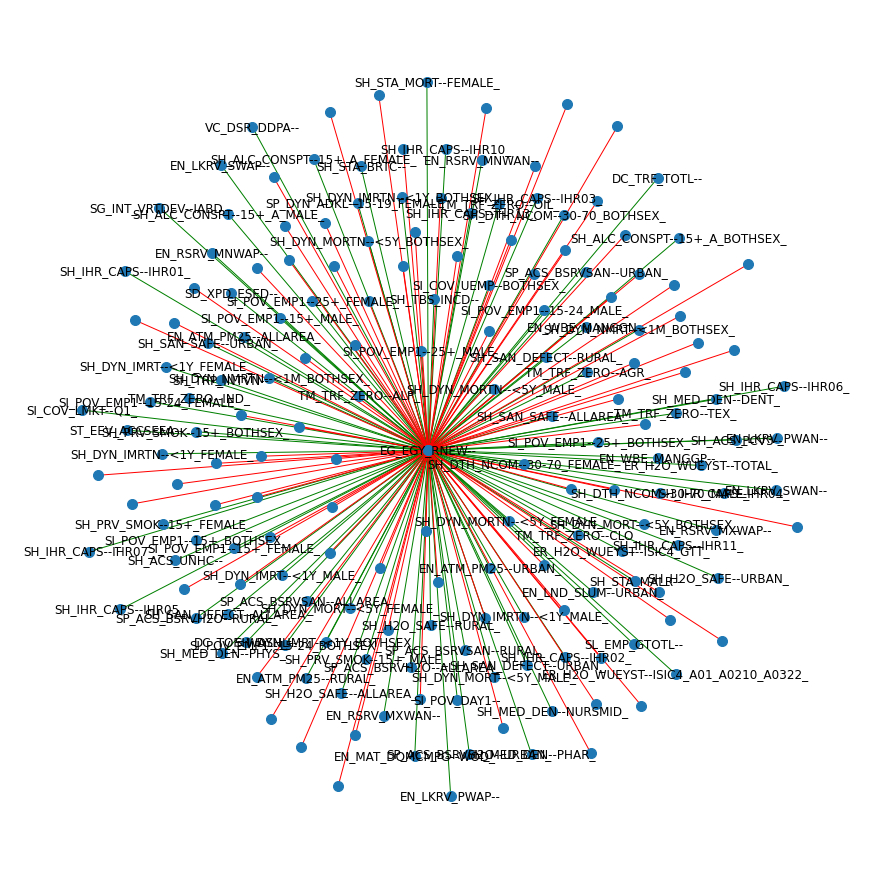

In [1051]:
#Most connected node in terms of positive eigenvector centrality
plt.figure(1,figsize=(12,12))
nx.draw(C,pos=pos2,edge_color='g',node_size=100,with_labels=True)
nx.draw(K,pos=pos2,edge_color='r',node_size=100,with_labels=False)

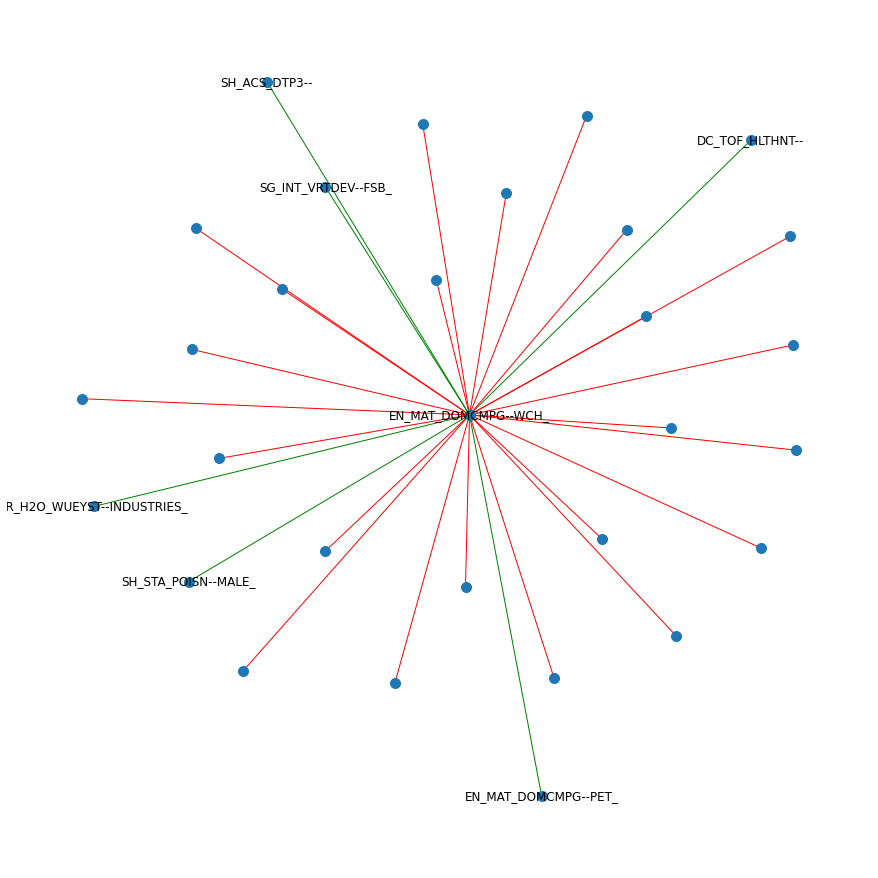

In [1045]:
#Least connected node in terms of positive eigenvector centrality
plt.figure(1,figsize=(12,12))
nx.draw(C,pos=pos2,edge_color='g',node_size=100,with_labels=True)
nx.draw(K,pos=pos2,edge_color='r',node_size=100,with_labels=False)

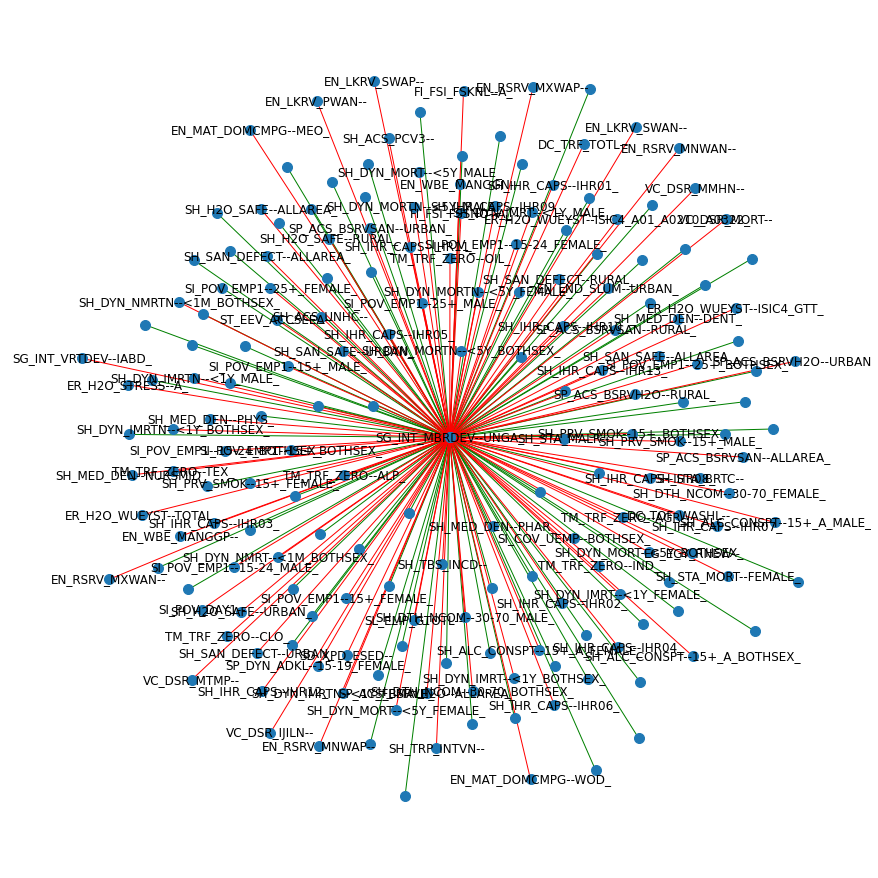

In [1058]:
#Most connected node in terms of negative eigenvector centrality
plt.figure(1,figsize=(12,12))
nx.draw(C,pos=pos2,edge_color='g',node_size=100,with_labels=False)
nx.draw(K,pos=pos2,edge_color='r',node_size=100,with_labels=True)

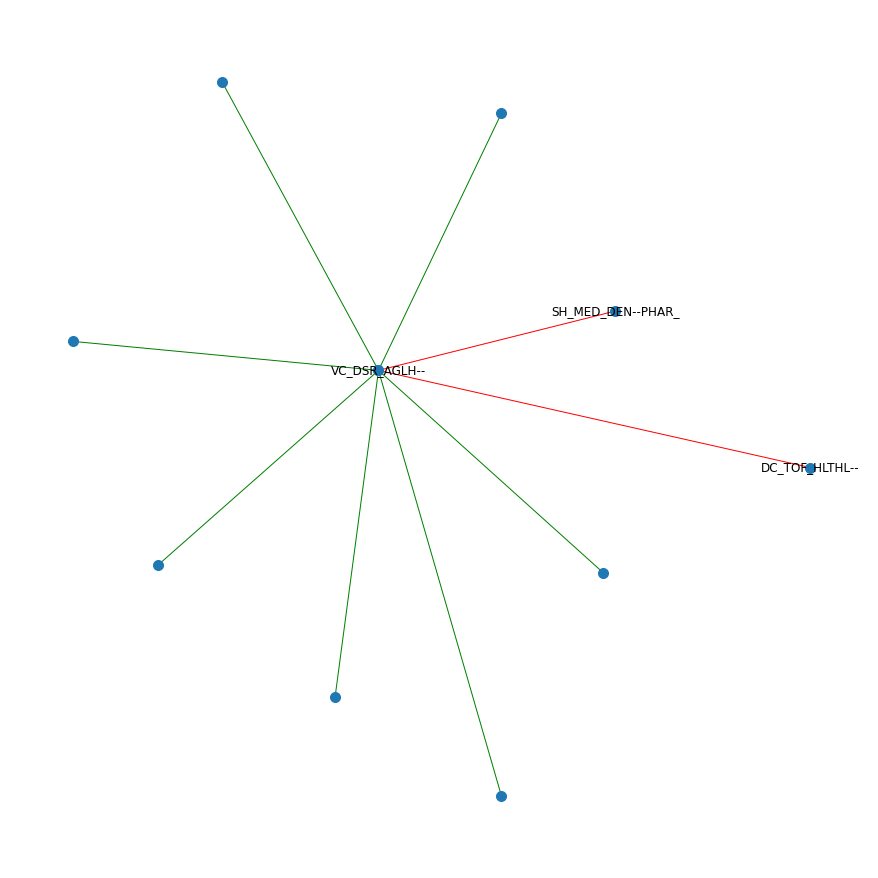

In [1064]:
#Least connected node in terms of negative eigenvector centrality
plt.figure(1,figsize=(12,12))
nx.draw(C,pos=pos2,edge_color='g',node_size=100,with_labels=False)
nx.draw(K,pos=pos2,edge_color='r',node_size=100,with_labels=True)

# Granger Causality Test

Test granger causality between most influential node and all its connections. Use AIC to determine lags, check to see how to use on non-stationary data.